# Subscribe term deposit prediction with Bank data

## About data

Source:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

**Abstract**: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).


### Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
- bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
- bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

**The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**


## Attribute Information:

Input variables:

#### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone')
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
#### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric)
- cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)

#### Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')



## Goal of the case study
In the above research paper, the reserchers have mentioned that the best results acheived is of AUC-0.8, so our goal for this case study will be to achieve similar results as of the research paper. Though it is to be mentioned that after going through the research paper I realised that the data does not have all the features that are mentioned in the paper.


## Type of Machine Learning Problem:
It is a binary classification problem where our objective is to predict whether a customer will subscribe a term deposit or not given the data of the customer.

## Performance Metric:
The performance metric used in this case study is:
- AUC Score

In [54]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

# Basic info of the dataset

In [55]:
# Loading the dataset
data = pd.read_csv("/content/bank-additional-full.csv", sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [56]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


There are no missing values in the dataset. So we don't need to handle missing data for this case study

In [57]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [58]:
print(data["job"].value_counts())
print("*"*25)
print(data["marital"].value_counts())
print("*"*25)
print(data["education"].value_counts())

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
*************************
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
*************************
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


In [59]:
print(data["y"].value_counts())

no     36548
yes     4640
Name: y, dtype: int64


From the above distribution we can be sure that the data is imbalanced, as the number of "no"s are also 8 times the number of "yes"

In [60]:
data.shape

(41188, 21)

# Exploratory Data Analysis

### Distribution of Class variable

In [61]:
 Y = data["y"]
 total = len(Y)*1
 ax=sns.countplot(x="y", data=data)
 for p in ax.patches:
  ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  plt.figure(figsize=(8,6))
  # ax.legend(labels=["no","yes"])
  plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Univariate Analysis

In [62]:
def countpl0t(label, dataset):
  plt.figure(figsize=(15,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset)
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

In [63]:
%matplotlib inline

def countplot_withY(label, dataset):
  plt.figure(figsize=(20,10))
  Y = data[label]
  total = len(Y)*1.
  ax=sns.countplot(x=label, data=dataset, hue="y")
  for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

  #put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
  ax.yaxis.set_ticks(np.linspace(0, total, 11))
  #adjust the ticklabel to the desired format, without changing the position of the ticks.
  ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
  # ax.legend(labels=["no","yes"])
  plt.show()

## Feature: Job (Categorical variable)

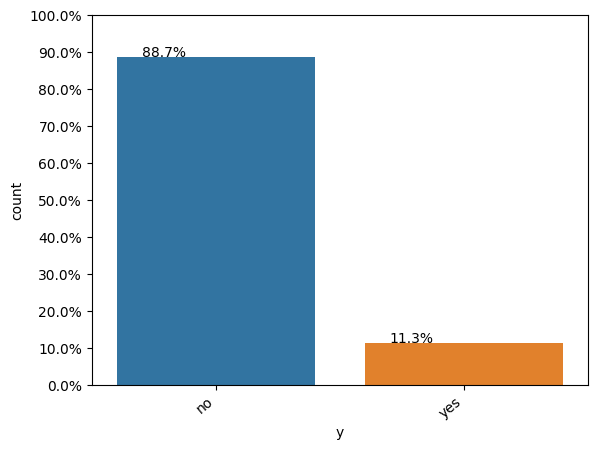

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

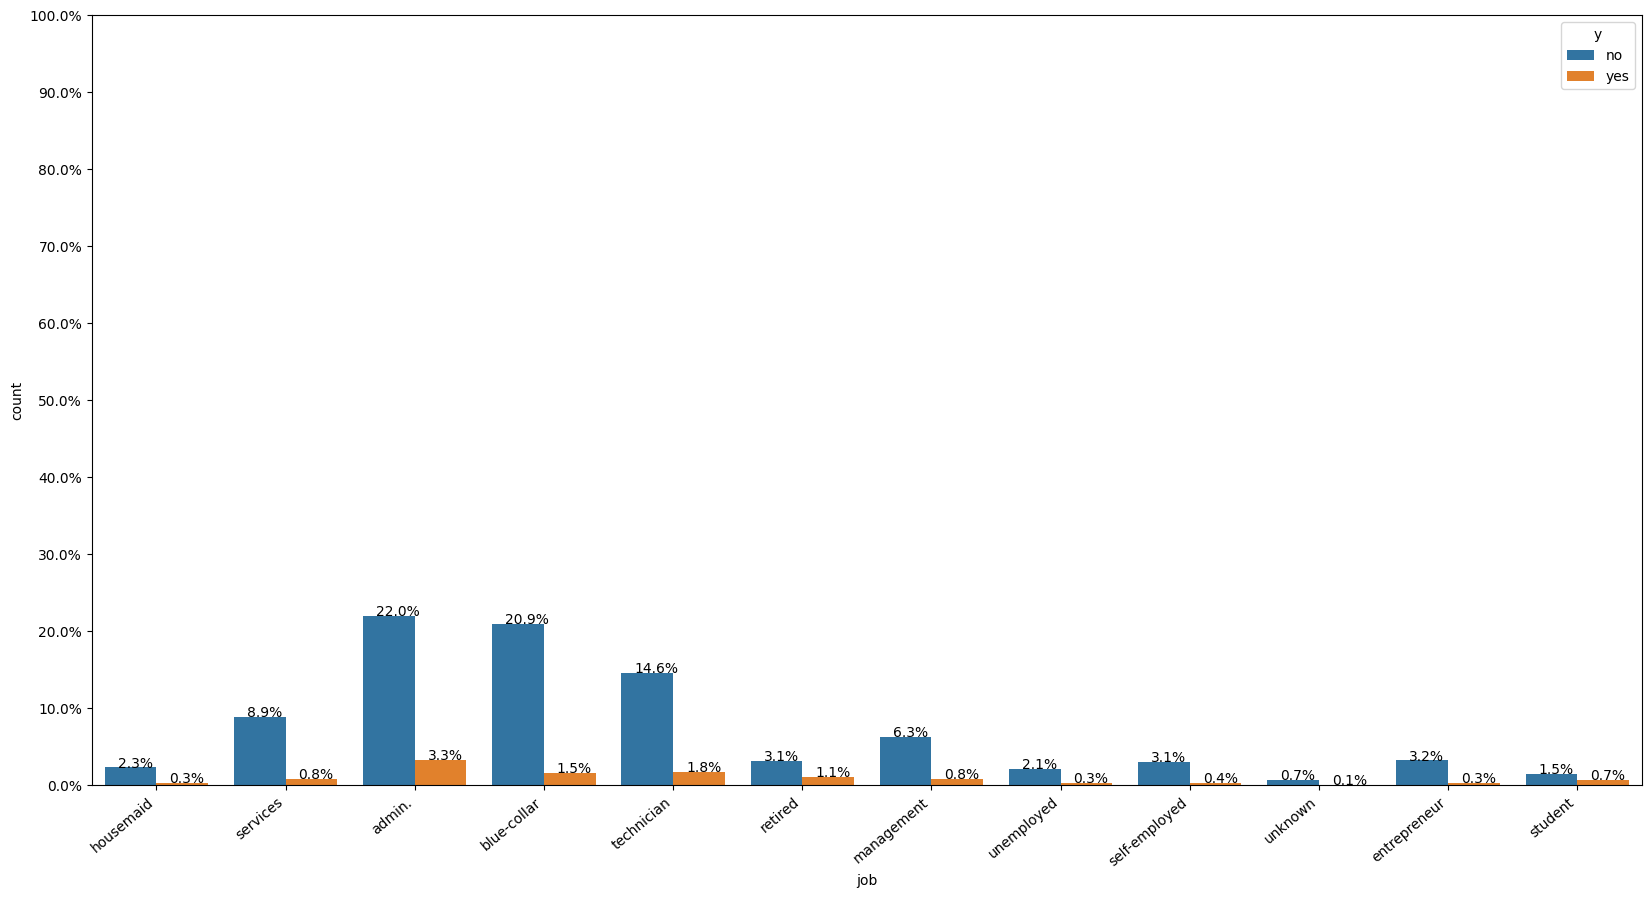

In [64]:
countplot_withY("job", data)

From the above distribution we can see that most of the customers have jobs as "admin", "blue-collar" or "technician". One interesting thing to find out would be to see the distribution for each classes as well. For example, how many people who work as an admin have subscribed a term deposit.

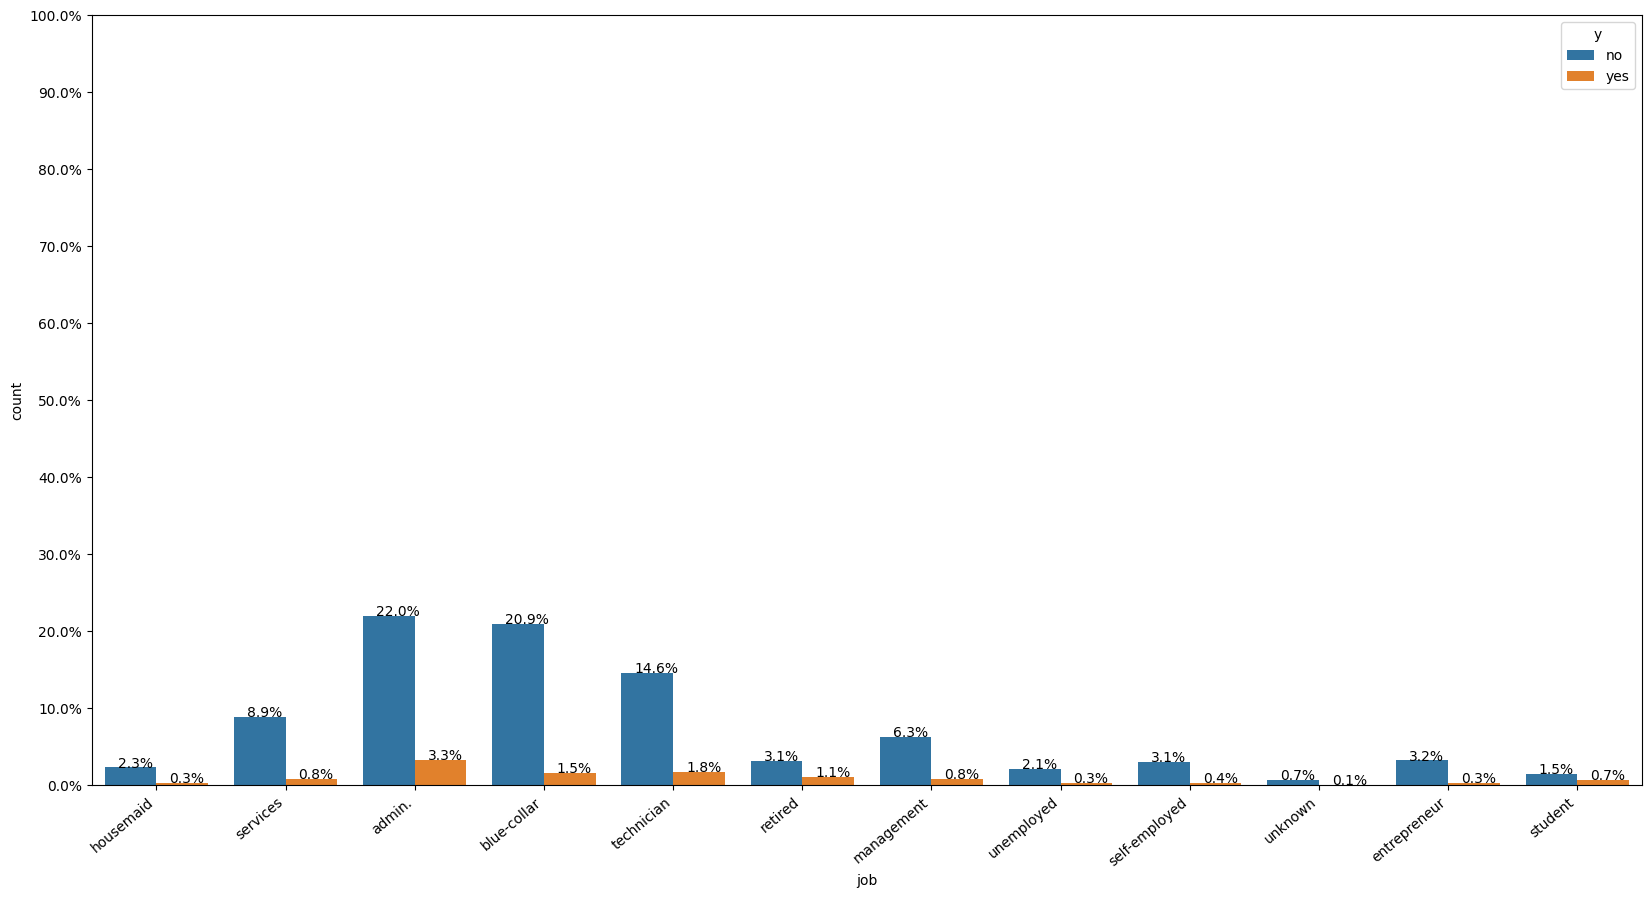

In [65]:
countplot_withY("job", data)

From the above plot, we can see that the customers who have a job of admin have the highest rate of subscribing a term deposit, but they are also the highest when it comes to not subscribing. This is simply because we have more customers working as admin than any other profession.

We can find out the odds or ratio of subscribing and not subscribing based on the profession, to find out which profession has the highest odds of subscribing given the data. At this point we are not sure if there is any correlation between job and target variable.

**Idea:** If we find that odds of one profession subscribing is greater than other job, we can use the odds or log(odds) as a feature by replacing jobs field with the odds, instead of doing one hot encoding.

## Feature: Marital (Categorical feature)

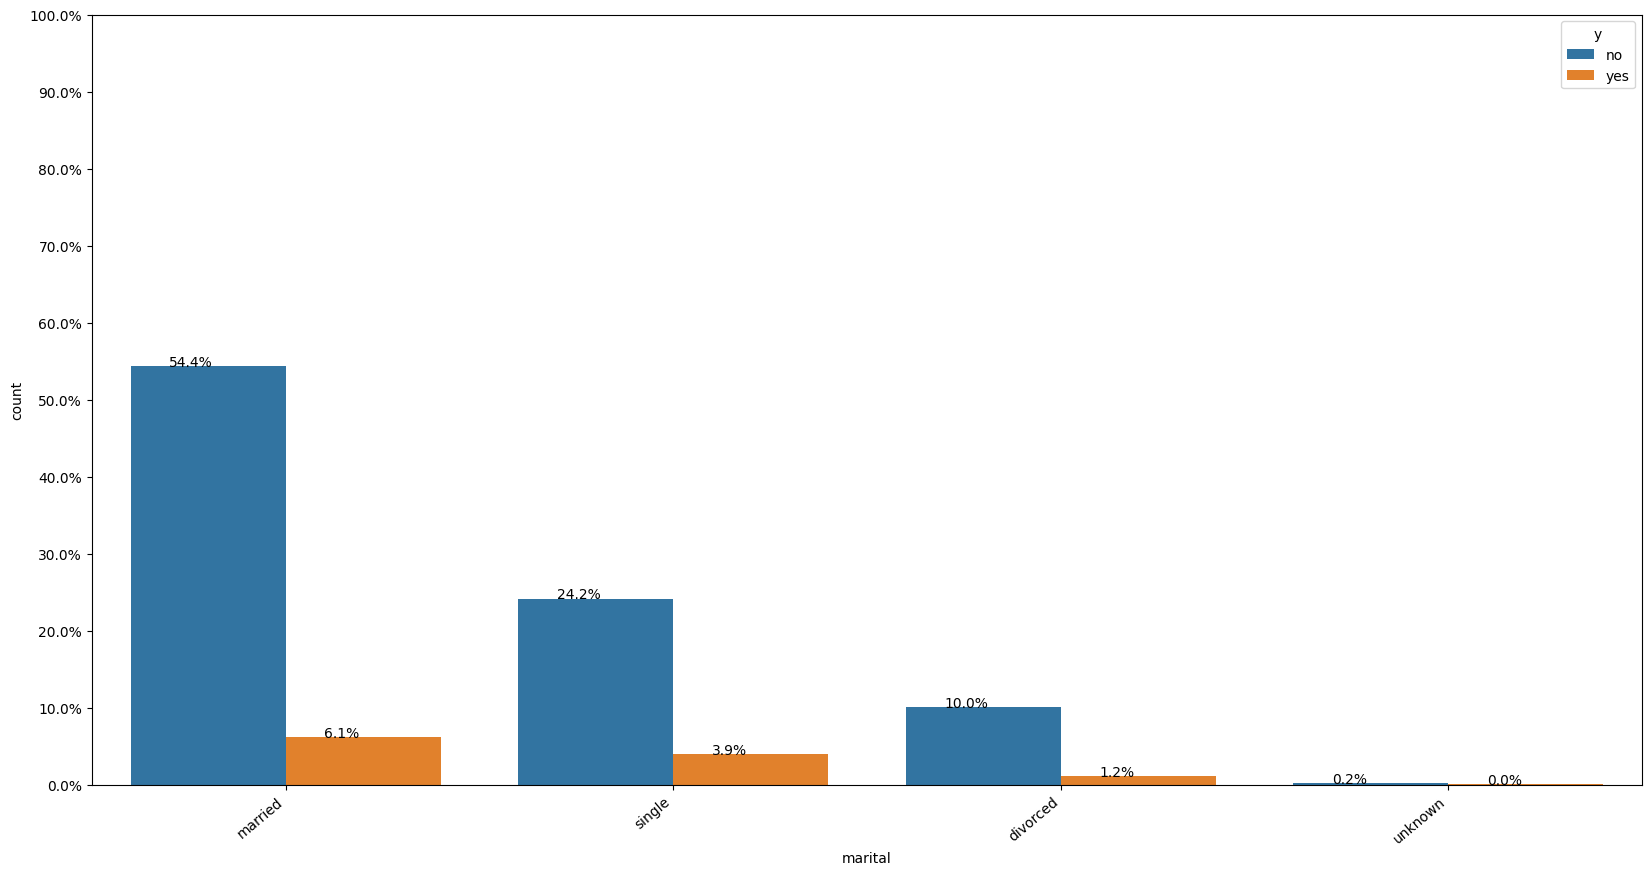

In [66]:
countplot_withY("marital", data)

## Feature: default (categorical)

This is a categorical feature which means "has credit in default", with the values "yes" and "no" and "unknown".

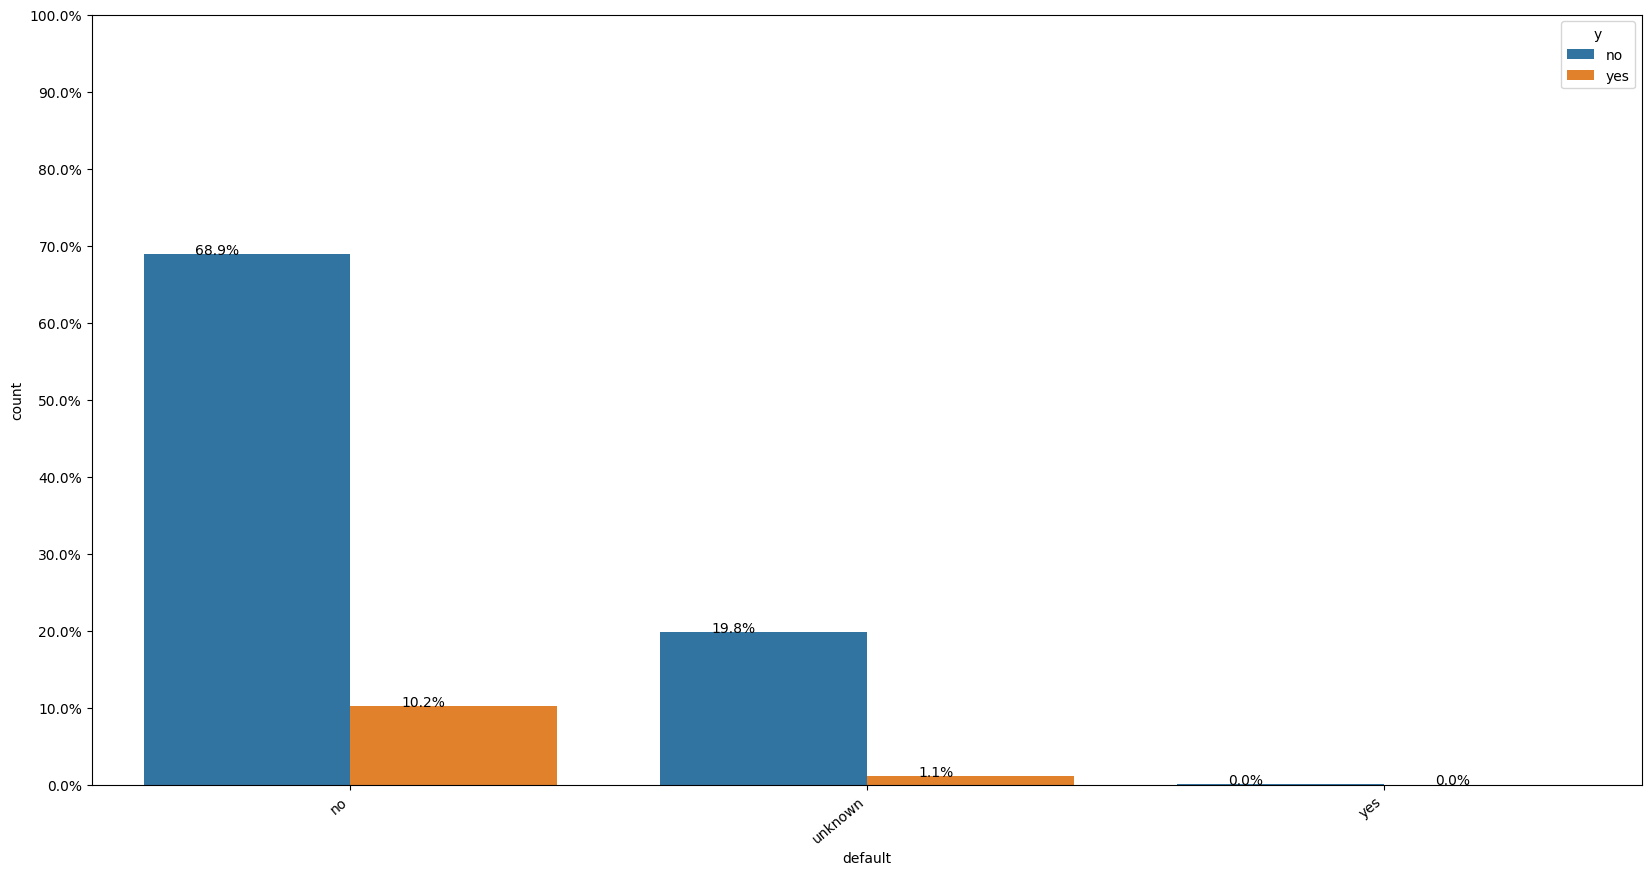

In [67]:
countplot_withY("default", data)

There is no customer with who has credit in default. Majority of the customers don't have, and the for the rest of the customers this field is unknown.

## Feature: Education

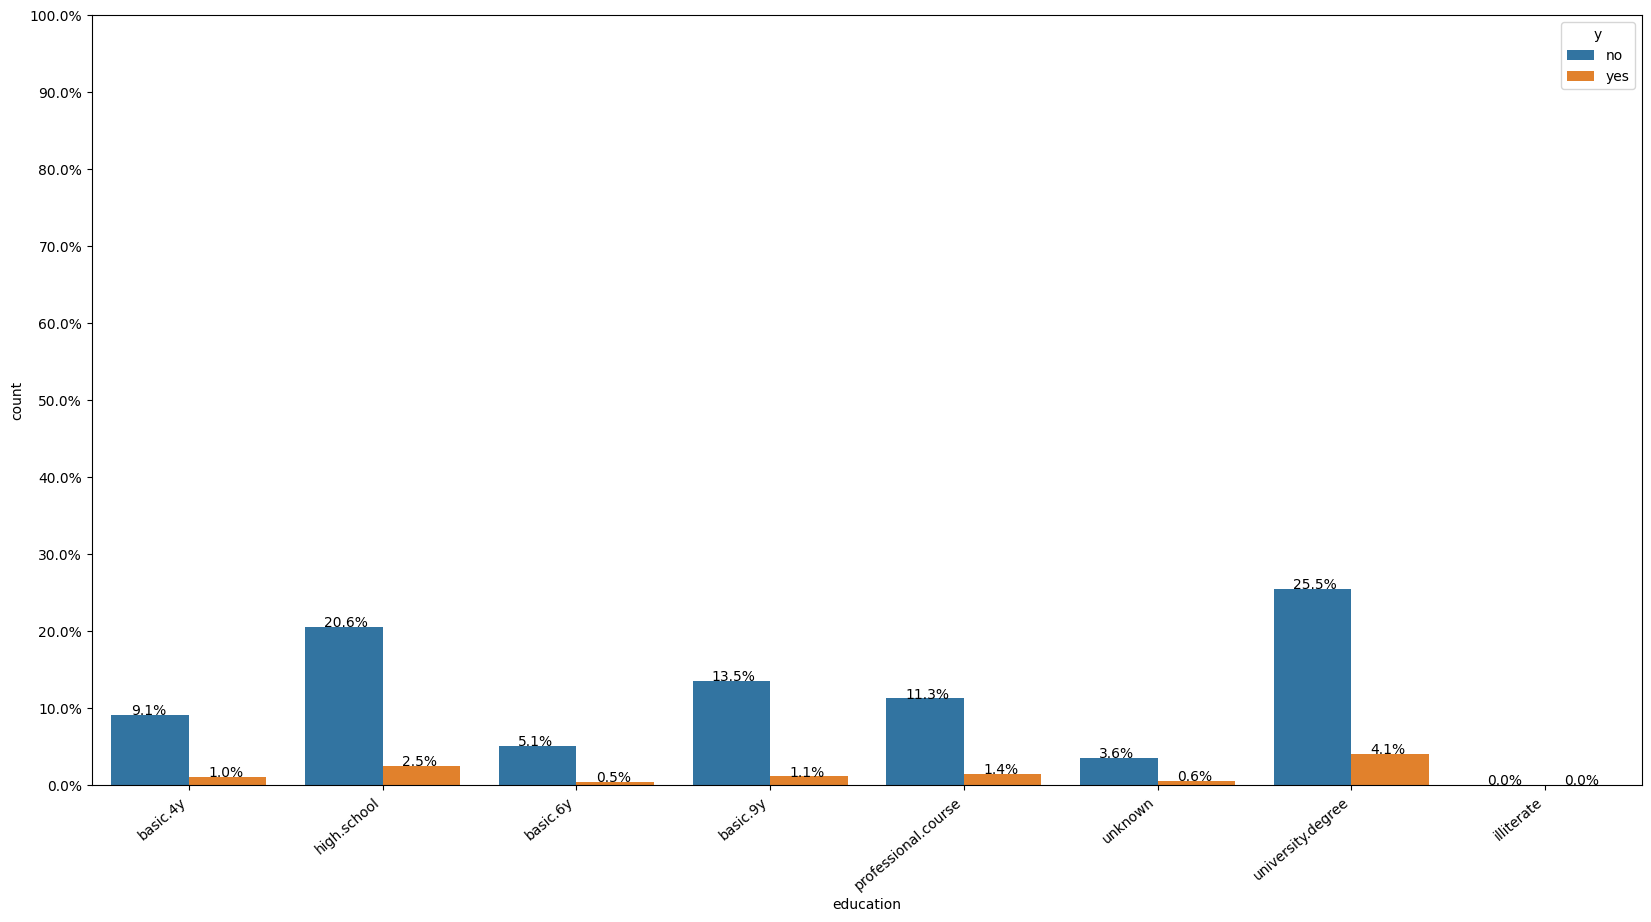

In [68]:
countplot_withY("education", data)

## Feature: housing (Categorical)

Majority of the customers have a housing loan.

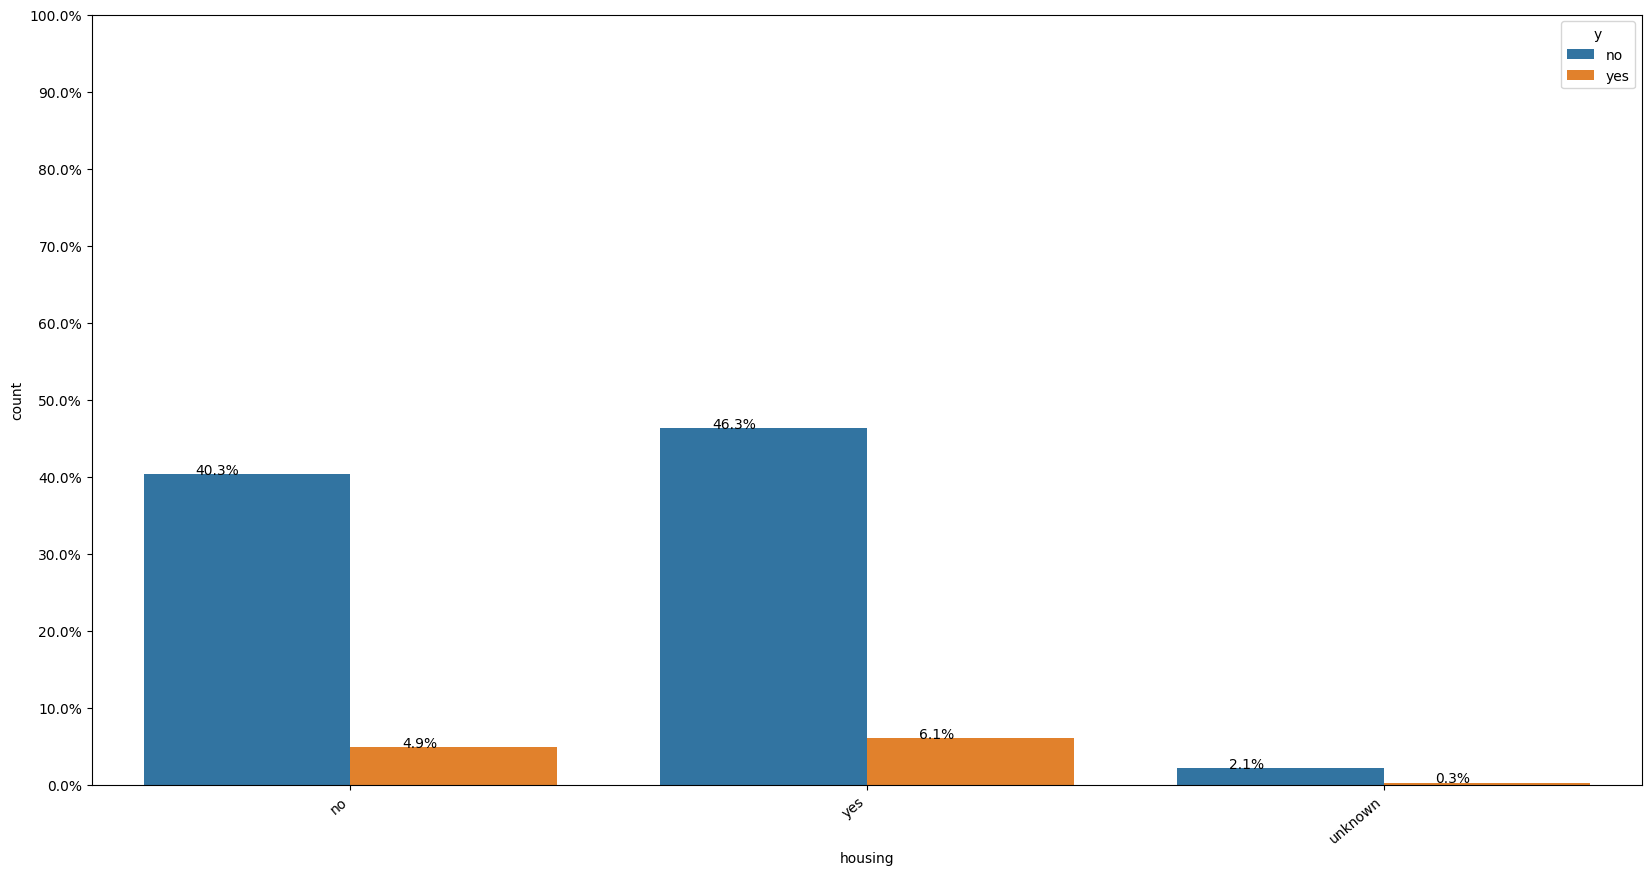

In [69]:
countplot_withY("housing", data)

## Feature: loan (Categorical)

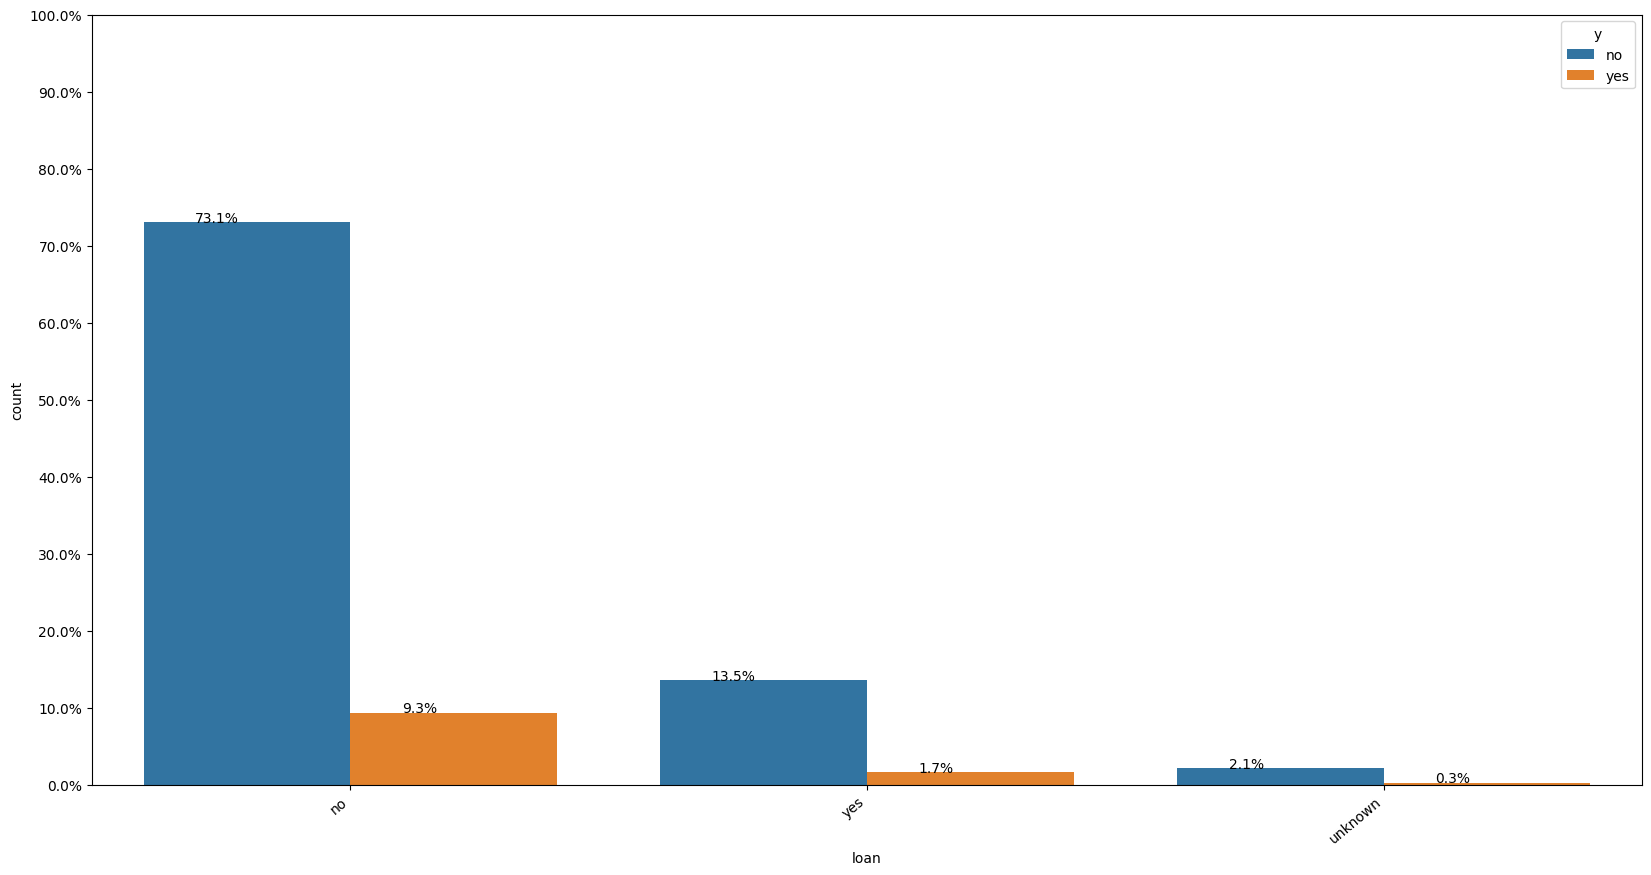

In [70]:
countplot_withY("loan", data)

## Feature: contact (Categorical)

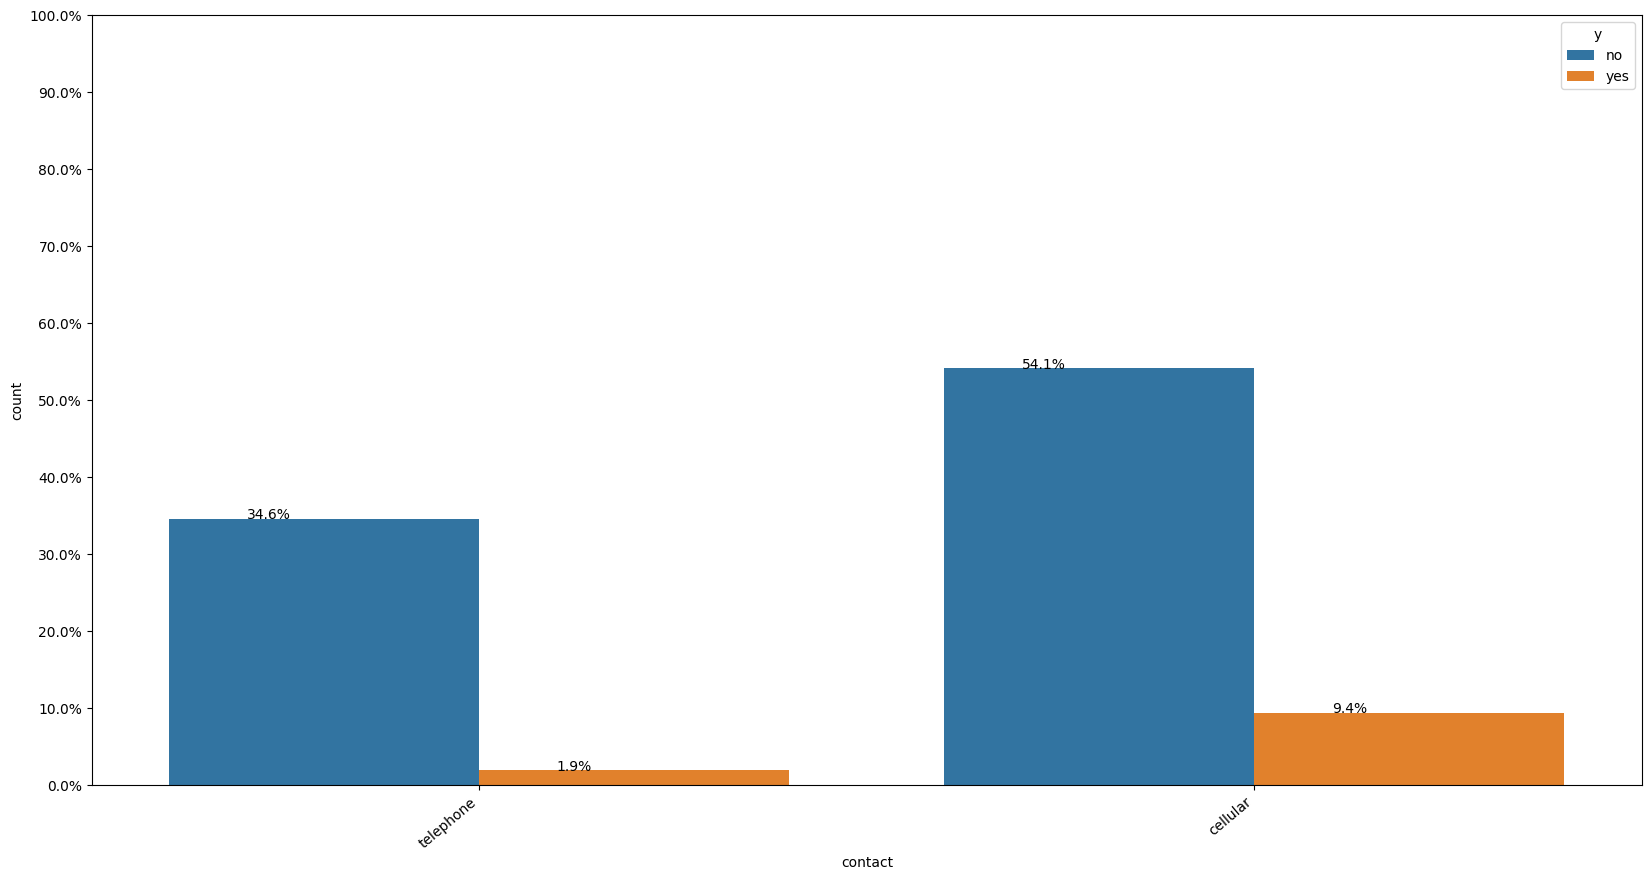

In [71]:
countplot_withY("contact", data)

## Feature: month (Categorical)

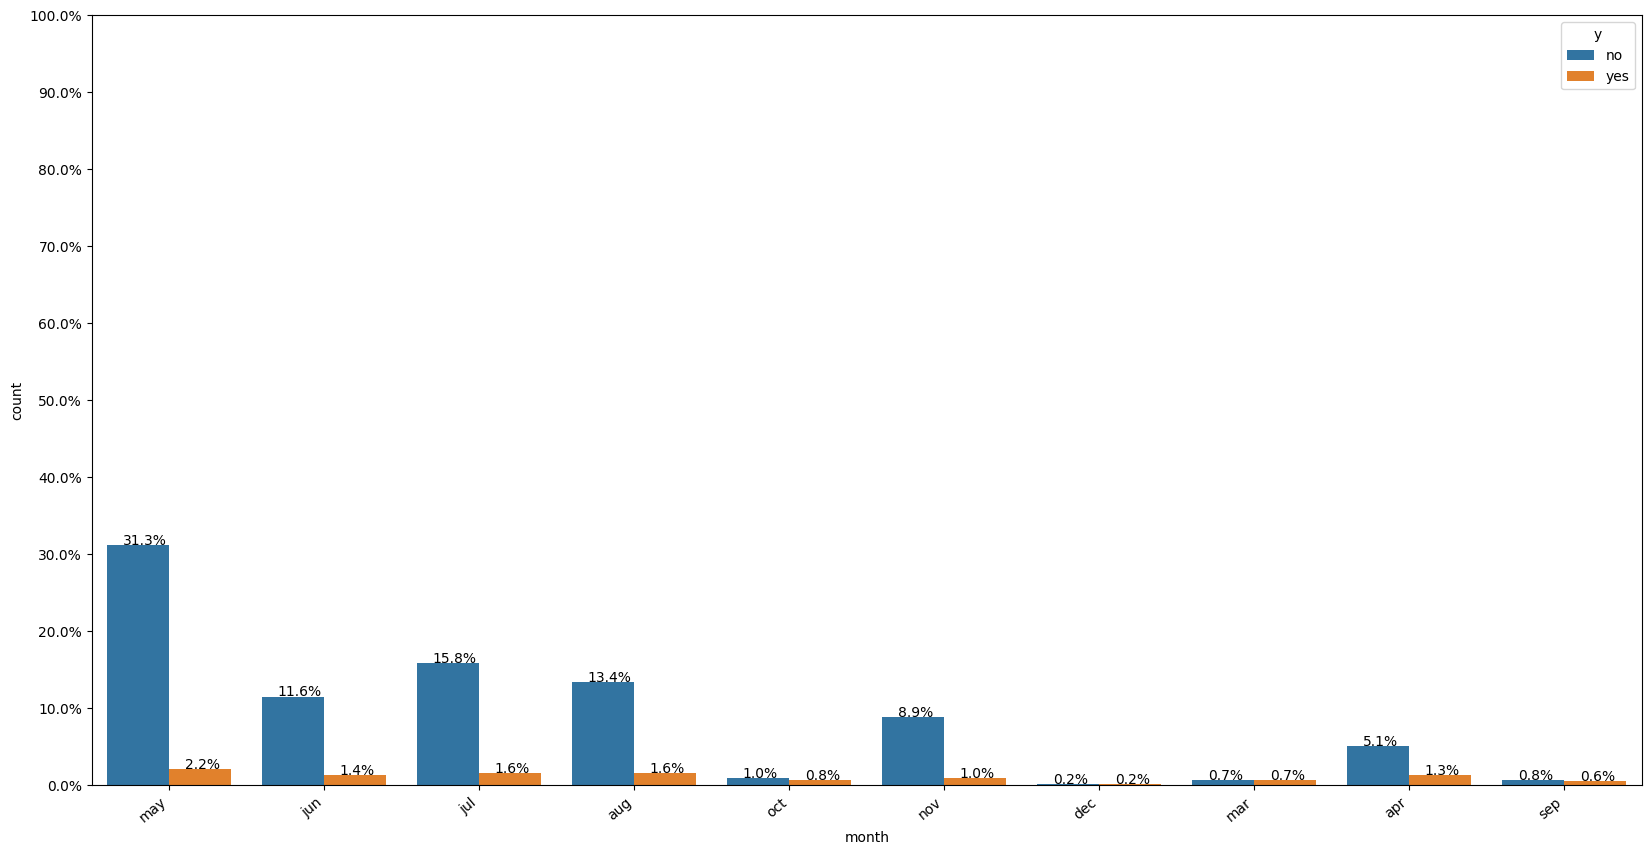

In [72]:
countplot_withY("month", data)

## Feature: day_of_week (Categorical)

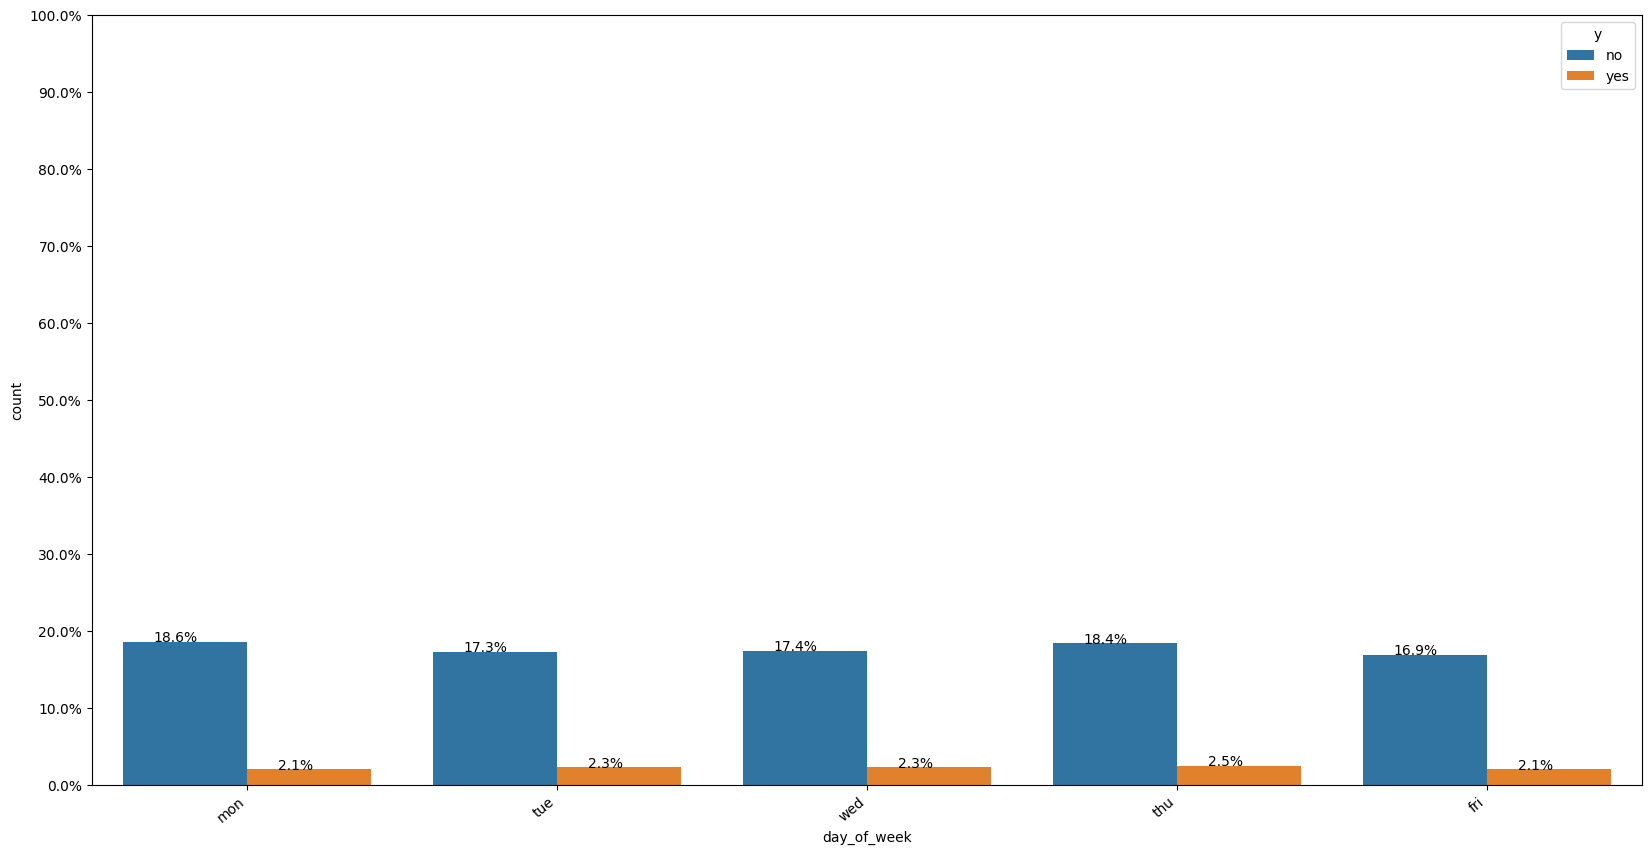

In [73]:
countplot_withY("day_of_week", data)

The day of the week seems to be irrelevent as we have the same amount of data for all the days of the week, and no:yes ratio is also almost same.

## Feature: poutcome (Categorical)

This feature indicates the outcome of the previous marketing campaign

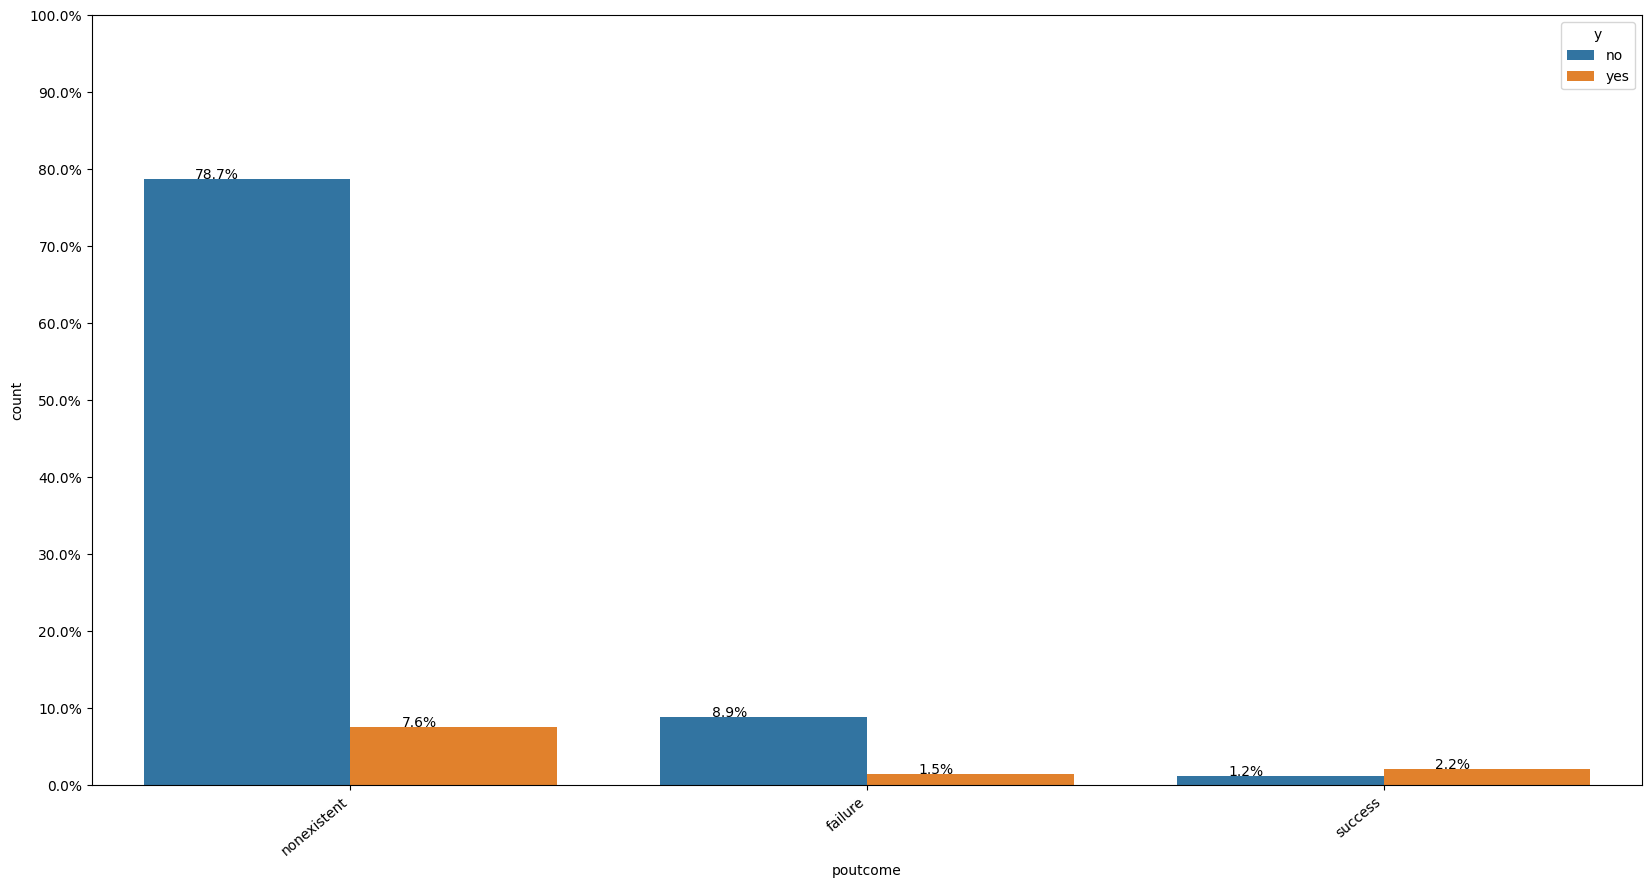

In [74]:
countplot_withY("poutcome", data)

## Feature: Age (Numeric)

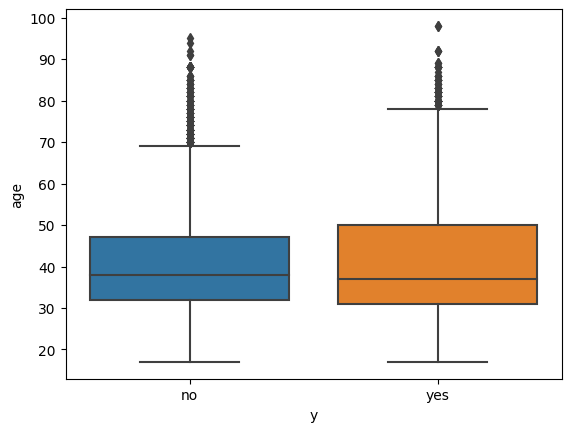

In [75]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="age")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

<ipython-input-76-2fd56025d666>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


<Axes: xlabel='age', ylabel='Density'>

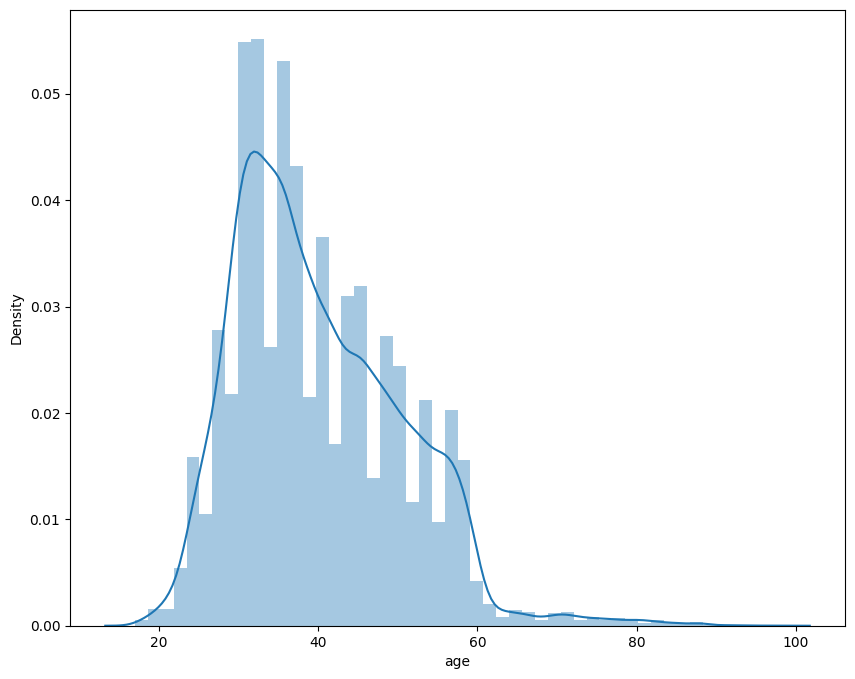

In [76]:
plt.figure(figsize=(10,8))
sns.distplot(data["age"])

As we can see in the above distribution also, that most of the customers are in the age range of 30-40.

## Feature: duration (numeric)

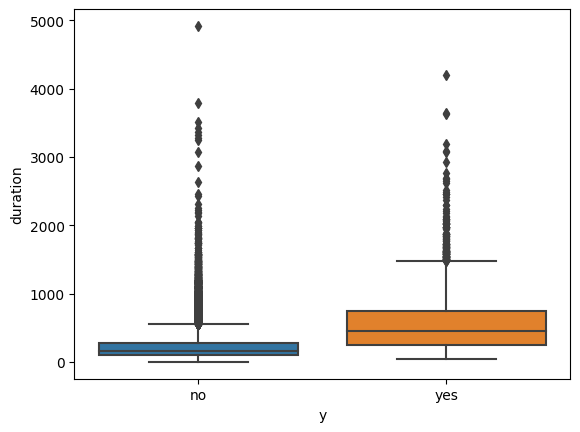

In [77]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="duration")
plt.show()

From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.

<ipython-input-78-edea28d9effd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["duration"])


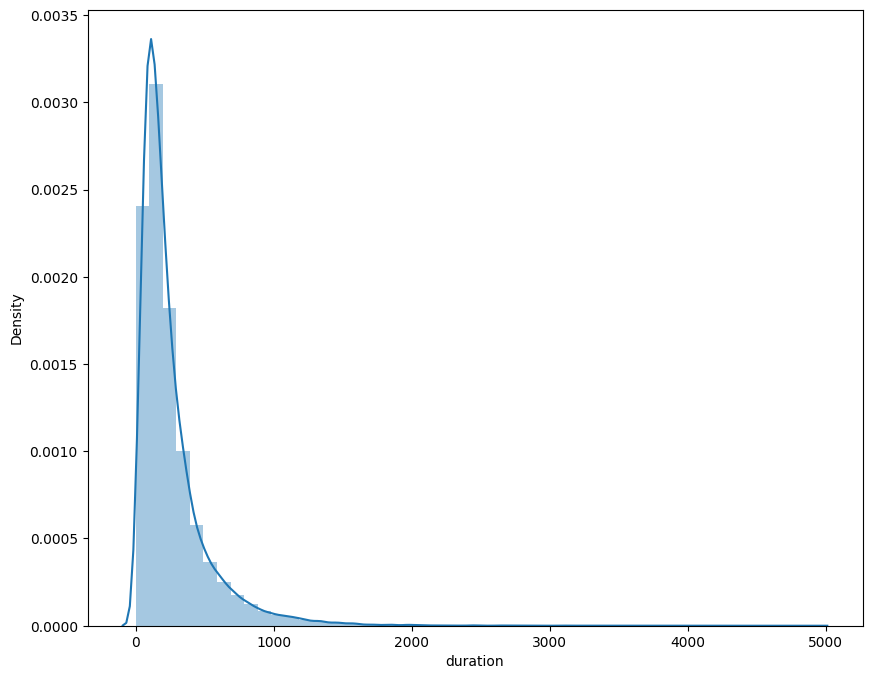

In [78]:
plt.figure(figsize=(10,8))
sns.distplot(data["duration"])
plt.show()

This seems like a powerlaw distribution where most the values are very low and very few have high values.

## Feature: campaign (numeric)

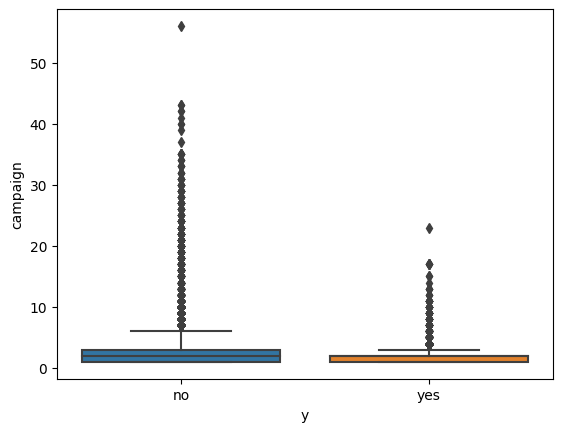

In [79]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="campaign")
plt.show()

<ipython-input-80-2b57110439a0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["campaign"])


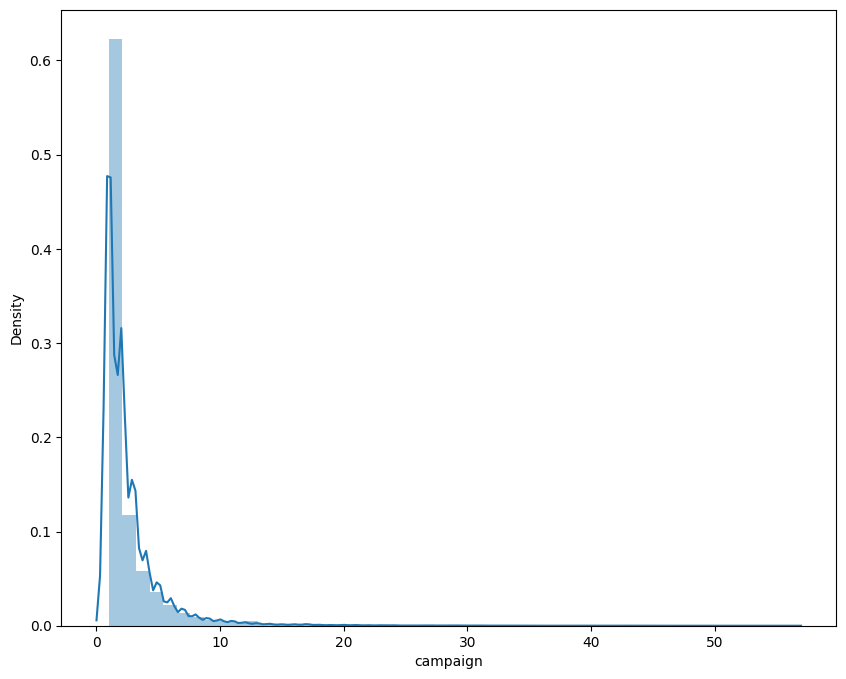

In [80]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["campaign"])
plt.show()

## Feature: pdays (numeric)

In [81]:
data["pdays"].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [82]:
data["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

Most of the values are 999, which means that the most of the customers have never been contacted before.

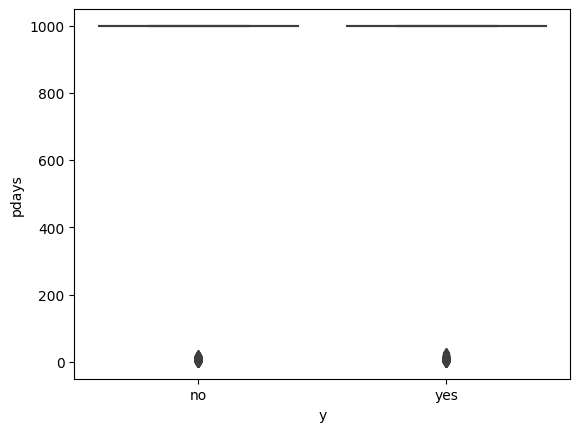

In [83]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="pdays")
plt.show()

<ipython-input-84-dcf290066464>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["y"]=="yes"]["pdays"])
<ipython-input-84-dcf290066464>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["y"]=="no"]["pdays"])


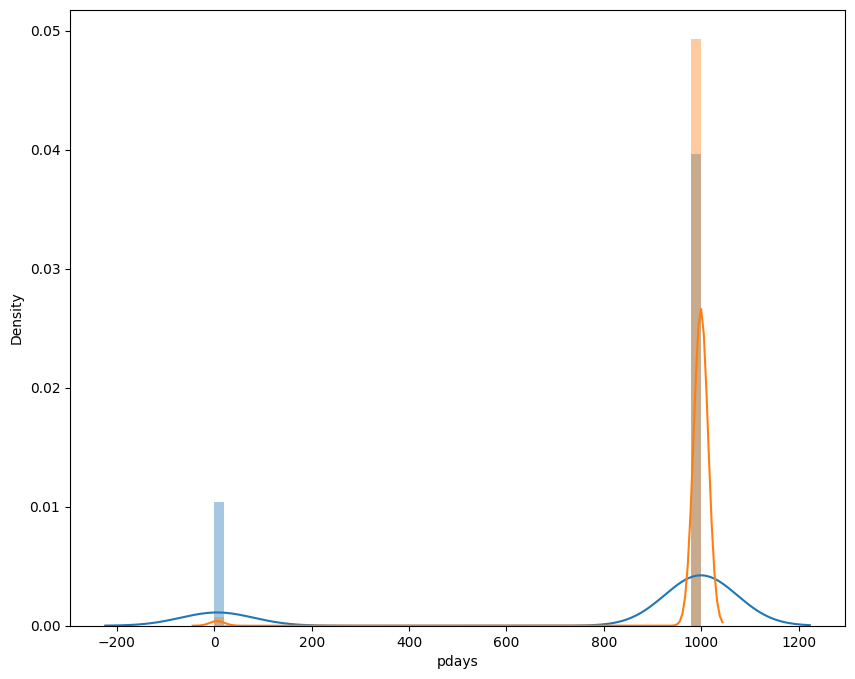

In [84]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["y"]=="yes"]["pdays"])
sns.distplot(data[data["y"]=="no"]["pdays"])
plt.show()

## Feature: previous (numeric)

In [85]:
data["previous"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [86]:
data["previous"].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [87]:
data[data["y"]=="yes"]["previous"].value_counts()

0    3141
1     967
2     350
3     128
4      38
5      13
6       3
Name: previous, dtype: int64

In [88]:
data[data["y"]=="no"]["previous"].value_counts()

0    32422
1     3594
2      404
3       88
4       32
5        5
6        2
7        1
Name: previous, dtype: int64

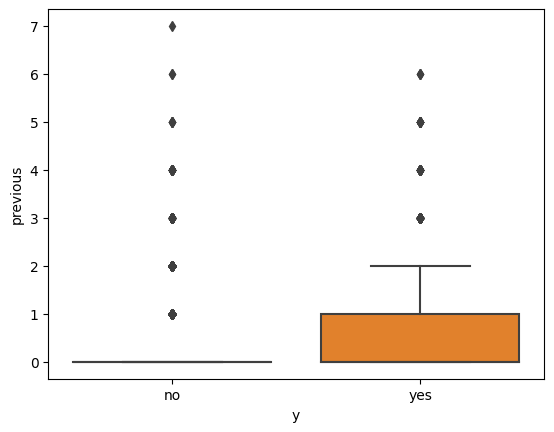

In [89]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="previous")
plt.show()

<ipython-input-90-e0841ef4a033>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["previous"])


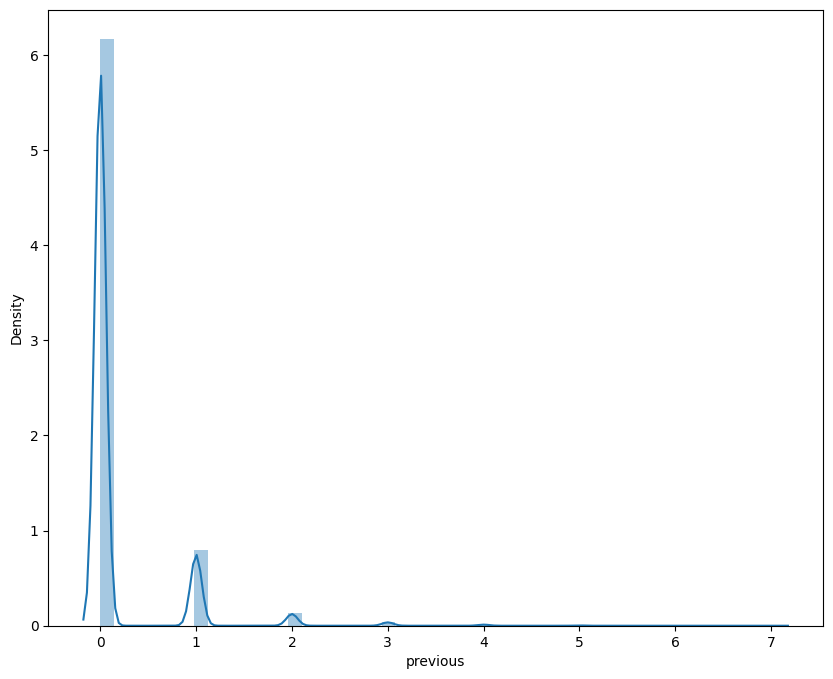

In [90]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["previous"])
plt.show()

<ipython-input-91-4ffd97f0969e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["y"]=="yes"]["previous"])
<ipython-input-91-4ffd97f0969e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["y"]=="no"]["previous"])


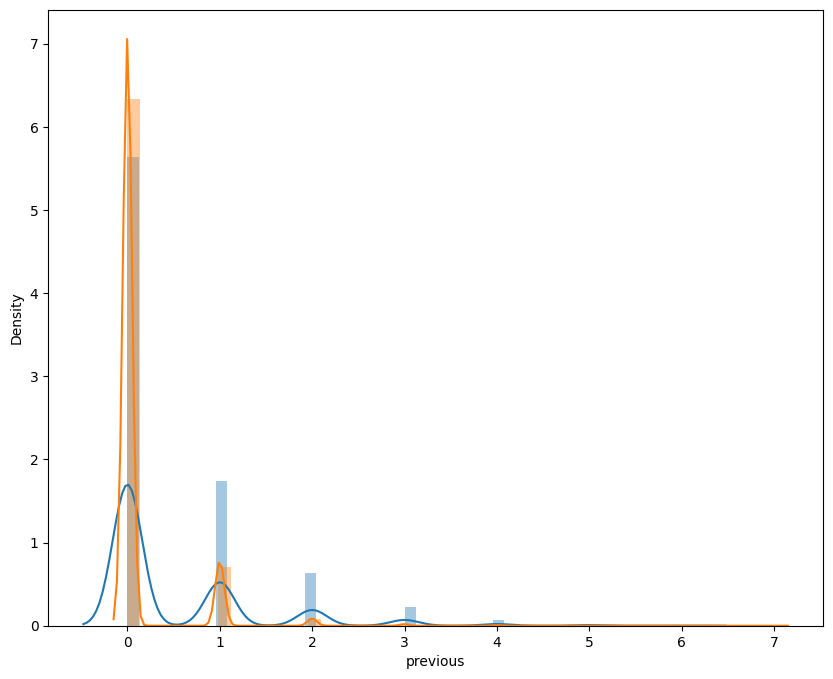

In [91]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["y"]=="yes"]["previous"])
sns.distplot(data[data["y"]=="no"]["previous"])
plt.show()

The previous feature is very similarly distributed for both the classes in the target variable. From basic EDA it is not sure how much value this individual feature have on the target variable.

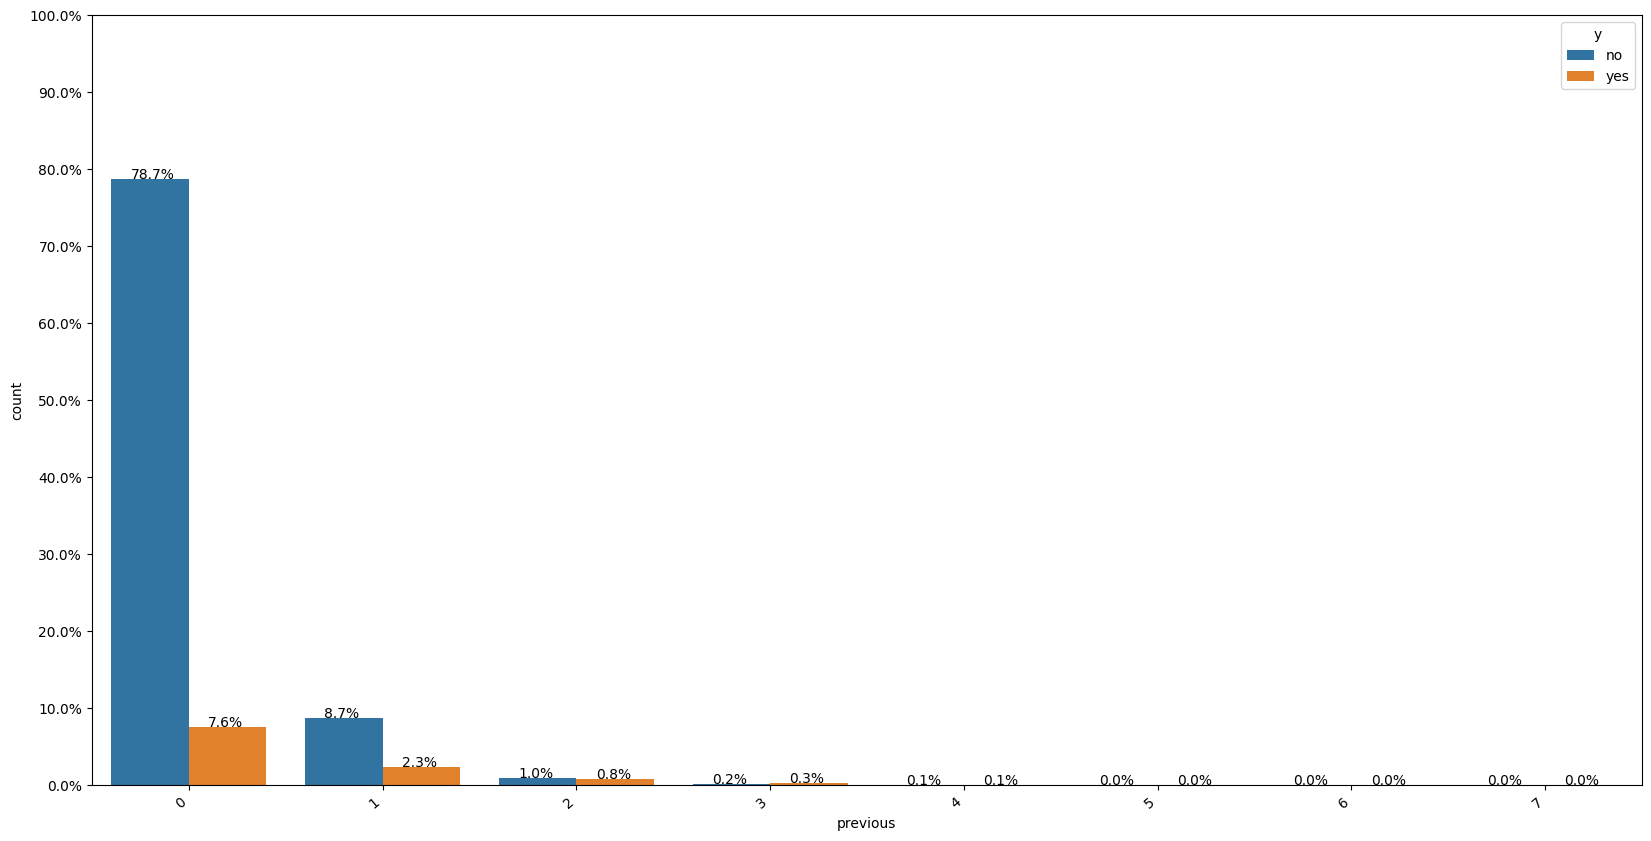

In [92]:
countplot_withY("previous", data)

## emp.var.rate

In [93]:
data["emp.var.rate"].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

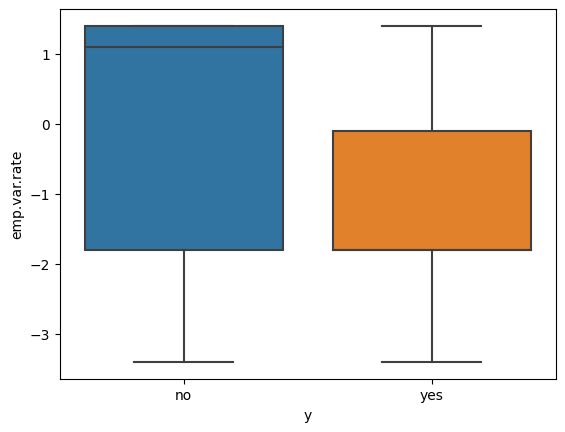

In [94]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="emp.var.rate")
plt.show()

<ipython-input-95-9ca4c92e7d47>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["emp.var.rate"])


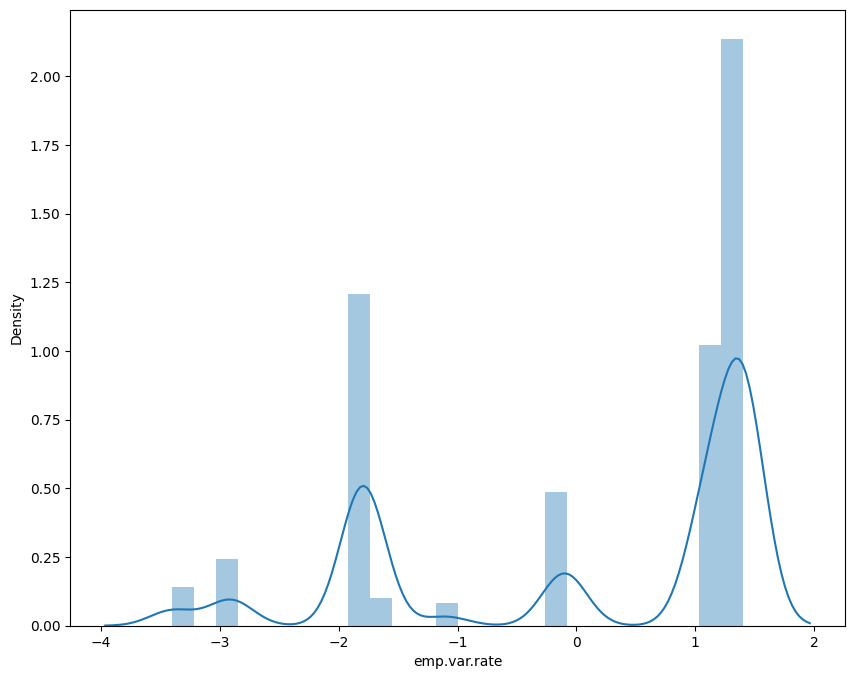

In [95]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["emp.var.rate"])
plt.show()

## cons.price.idx

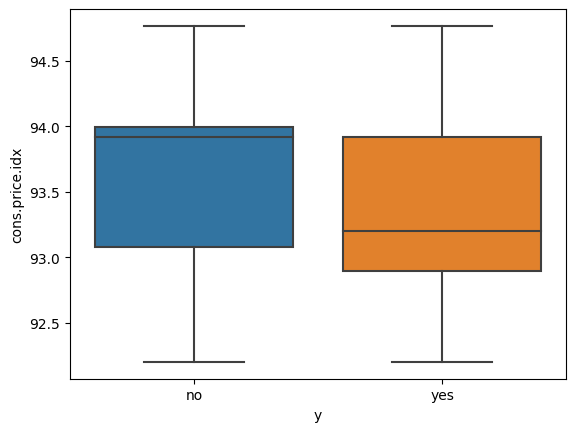

In [96]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="cons.price.idx")
plt.show()

<ipython-input-97-bbb7081b9214>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["cons.price.idx"])


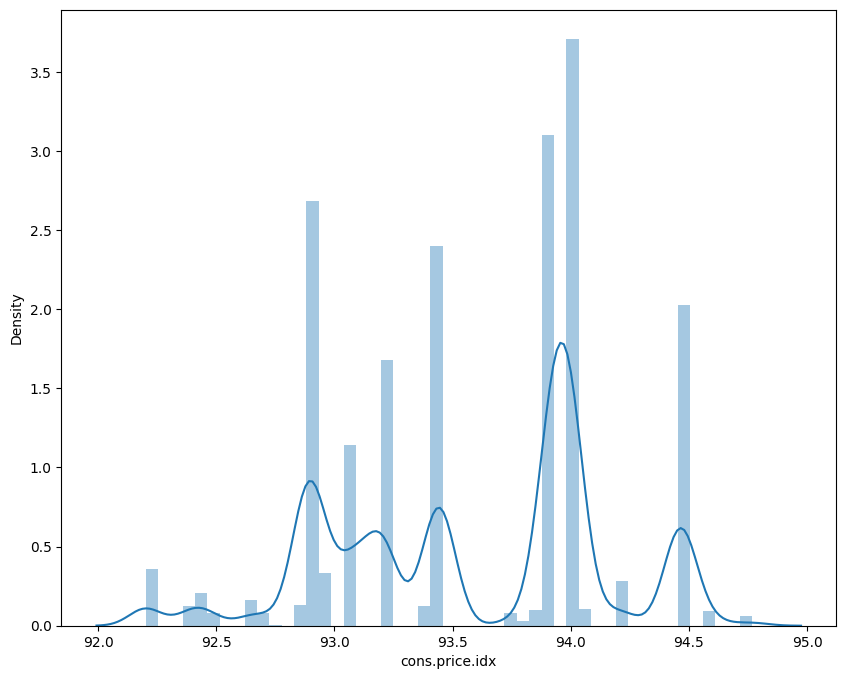

In [97]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["cons.price.idx"])
plt.show()

## cons.conf.idx

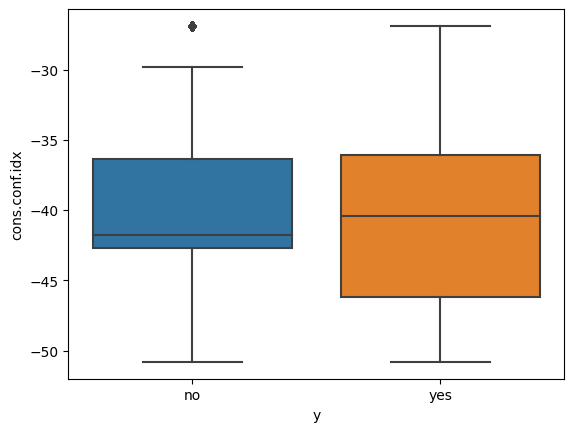

In [98]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="cons.conf.idx")
plt.show()

<ipython-input-99-5d1eb32372af>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["cons.conf.idx"])


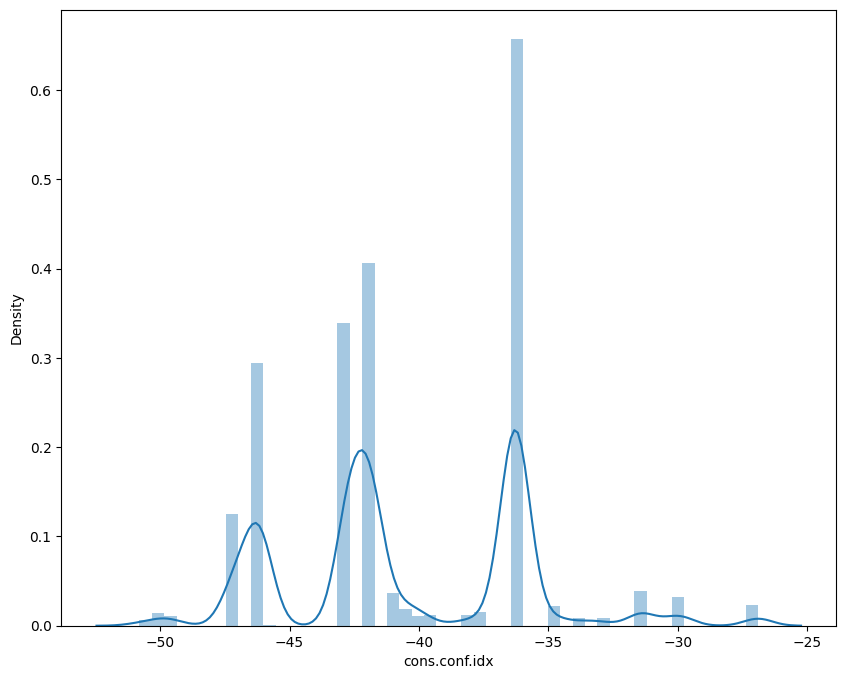

In [99]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["cons.conf.idx"])
plt.show()

## euribor3m

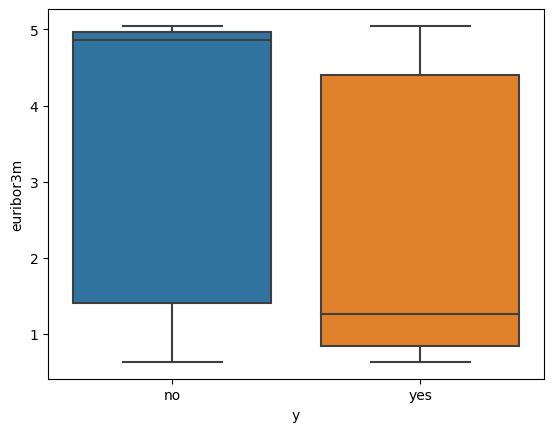

In [100]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="euribor3m")
plt.show()

<ipython-input-101-12213de3db3d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["euribor3m"])


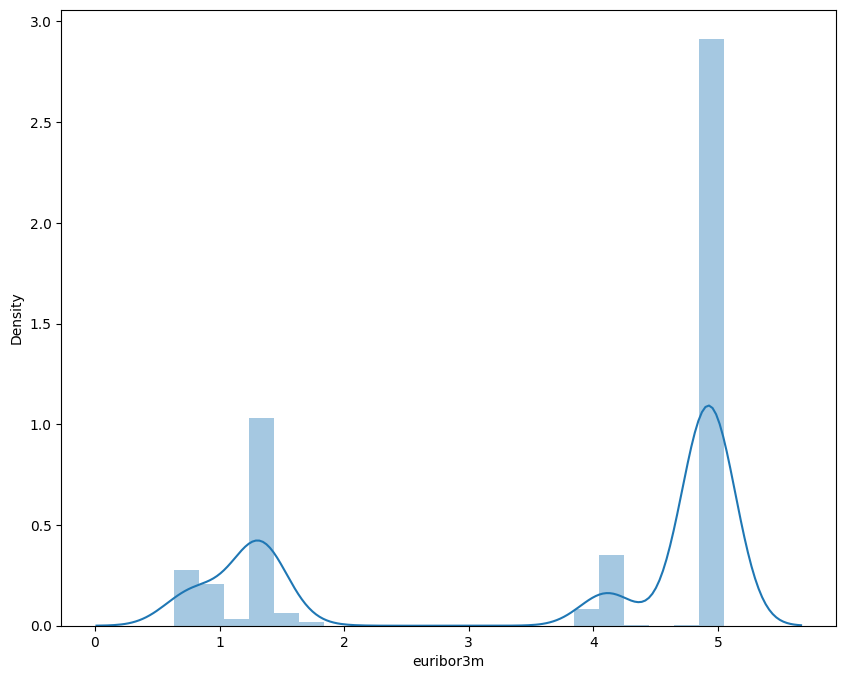

In [101]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["euribor3m"])
plt.show()

## nr.employed

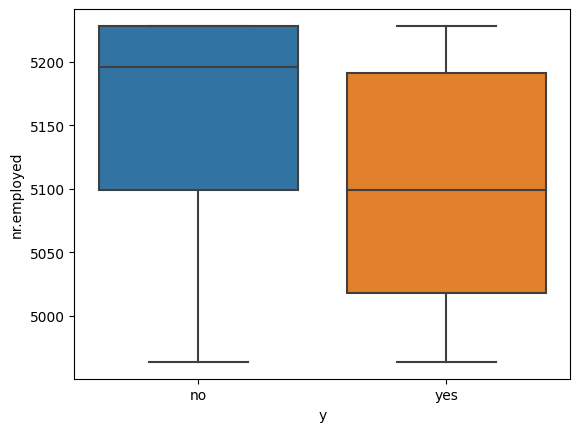

In [102]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="nr.employed")
plt.show()

<ipython-input-103-0024074fdd4d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["nr.employed"])


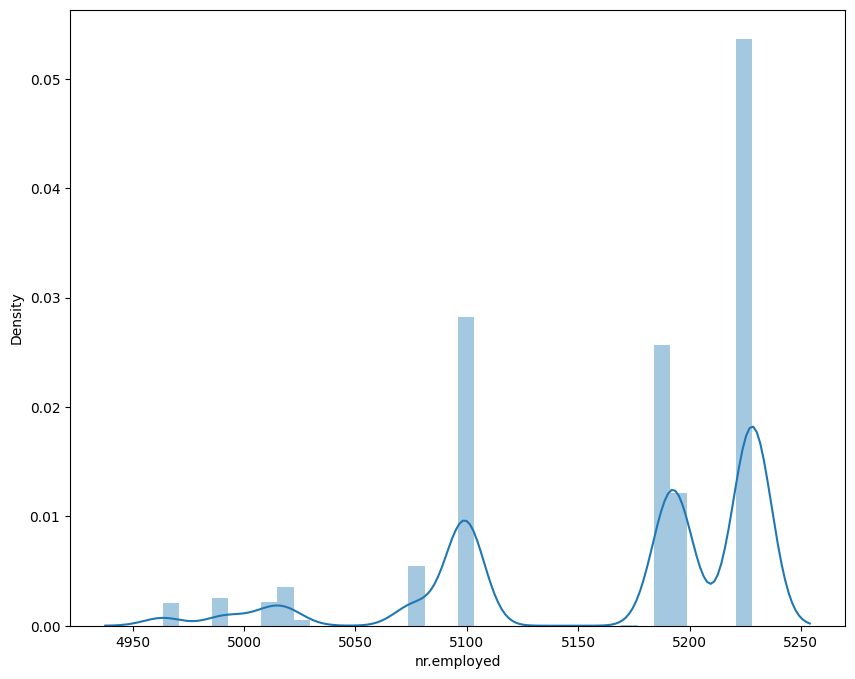

In [103]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["nr.employed"])
plt.show()

## Correlation matrix of numerical features

<ipython-input-104-cfcd2fc74469>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


Text(0.5, 1.05, 'Pearson correlation of Features')

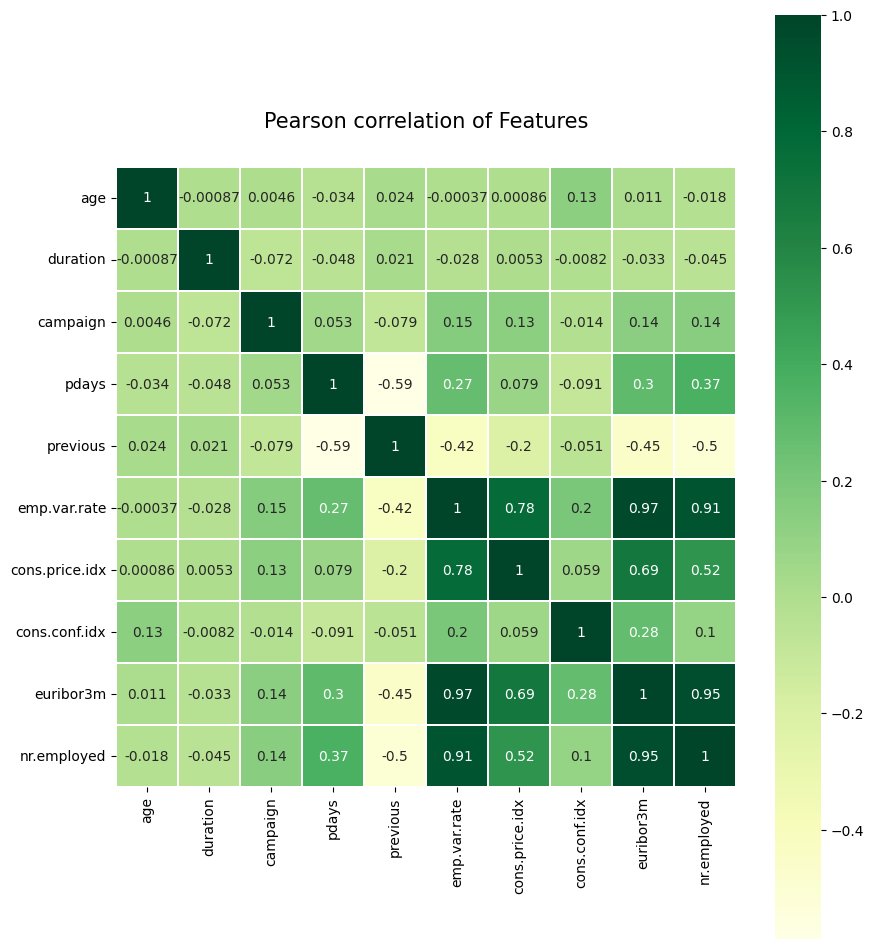

In [104]:
# Idea of correlation matrix of numerical feature: https://medium.com/datadriveninvestor/introduction-to-exploratory-data-analysis-682eb64063ff
%matplotlib inline
corr = data.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

From the above heatmap we can see that there are some numerical features which share a high correlation between them, e.g nr.employed and euribor3m these features share a correlation value of 0.95, and euribor3m and emp.var.rate share a correlation of 0.97, which is very high compared to the other features that we see in the heatmap.

# Data Preprocessing

In [105]:
# Import the libraries
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd

from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [106]:
# Loading the dataset
data = pd.read_csv("/content/bank-additional-full.csv", sep=";")
# data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Dealing with Missing data

From the above basic info of each feature, we know that there are no missing values in this dataset.

## Dealing with duplicate data

In [107]:
data_dup = data[data.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [108]:
data_dup.shape

(12, 21)

So we have 12 rows which are duplicates. We will drop these duplicate rows before proceeding furthur.

In [109]:
data = data.drop_duplicates()
data.shape

(41176, 21)

## Separate inpedendent and target variables

In [110]:
data_x = data.iloc[:, :-1]
print("Shape of X:", data_x.shape)
data_y = data["y"]
print("Shape of Y:", data_y.shape)

Shape of X: (41176, 20)
Shape of Y: (41176,)


## Train Test split

In [111]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26352, 20)
X CV: (6588, 20)
X Test: (8236, 20)
Y Train: (26352,)
Y CV: (6588,)
Y Test: (8236,)


In [112]:
# Replace "no" with 0 and "yes" with 1

y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

# Encoding Categorical Features

For this case study I will encode categorical features using two methods:
- One hot encoding
- Response coding

And compare the results to see which encoding method performed better for the data that we have.

## One Hot Encoding Categorical features

The next big step for our data preprocessing is to encode all the categorical features so that we can apply models on the data.

In [113]:
# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [114]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [115]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
  '''
      This function will add the one hot encoded to the dataframe.

  '''
  for i, col in enumerate(vectorizer.get_feature_names()):
    colname = name+"_"+col
    # df[colname] = pd.SparseSeries(sparse[:, i].toarray().flatten(), fill_value=0)
    df[colname] = sparse[:, i].toarray().ravel().tolist()

  return df

def OneHotEncoder(categorical_cols, X_train, X_test, X_cv=None, include_cv=False):
  '''
    This function takes categorical column names as inputs. The objective
    of this function is to take the column names iteratively and encode the
    features using One hot Encoding mechanism and also adding the encoded feature
    to the respective dataframe.

    The include_cv parameter indicates whether we should include CV dataset or not.
    This is added specifically because when using GridSearchCV or RandomizedSearchCV,
    we only split the dataset into train and test to give more data to training purposes.
    This is done because GridSearchCV splits the data internally anyway.
  '''

  for i in categorical_cols:
    Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
    print("Encoding for feature: ", i)
    # Encoding training dataset
    temp_cols = Vectorizer.fit_transform(X_train[i])
    X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)

    # Encoding Cross validation dataset
    if include_cv:
      temp_cols = Vectorizer.transform(X_cv[i])
      X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)

    # Encoding Test dataset
    temp_cols = Vectorizer.transform(X_test[i])
    X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)


In [116]:
# Drop the categorical features as the one hot encoded representation is present
X_train = X_train.drop(categorical_cols, axis=1)
X_cv = X_cv.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of CV: ", X_cv.shape)
print("Shape of test: ", X_test.shape)

Shape of train:  (26352, 10)
Shape of CV:  (6588, 10)
Shape of test:  (8236, 10)


In [117]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26352 entries, 1820 to 24059
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26352 non-null  int64  
 1   duration        26352 non-null  int64  
 2   campaign        26352 non-null  int64  
 3   pdays           26352 non-null  int64  
 4   previous        26352 non-null  int64  
 5   emp.var.rate    26352 non-null  float64
 6   cons.price.idx  26352 non-null  float64
 7   cons.conf.idx   26352 non-null  float64
 8   euribor3m       26352 non-null  float64
 9   nr.employed     26352 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 2.2 MB


In [118]:
data_x.to_csv("encoded_data_x.csv")
data_y.to_csv("data_y.csv")

## Benchmark model

We will create a simple LogisticRegression model without any hyper-parameter tuning and apply that to the data in two ways.

- Use "Duration" feature to see how the model performs with this feature. It will probably give very high AUC as the duration feature is very correlated with the target variable. But obviously we can't use the Duration feature for actual modelling.
- Next remove the "Duration" feature, and apply the same model to check how the model performs.

## Visualize data with T-SNE plot

We will plot the t-sne plot for the dataset with "Duration" feature.

In [119]:
# Assuming your data is in a DataFrame named 'data'
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


In [120]:
import pandas as pd

# Assuming your data is in a DataFrame named 'data'
print(data['duration'].value_counts())

90      170
85      170
136     168
73      167
124     163
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64


In [121]:
# Assuming your data is in a DataFrame named 'data'
print(data['duration'].unique())

[ 261  149  226 ... 1246 1556 1868]


In [122]:
# Assuming your data is in a DataFrame named 'data'
data['duration'] = data['duration'].map({'no': 0, 'yes': 1})

In [123]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


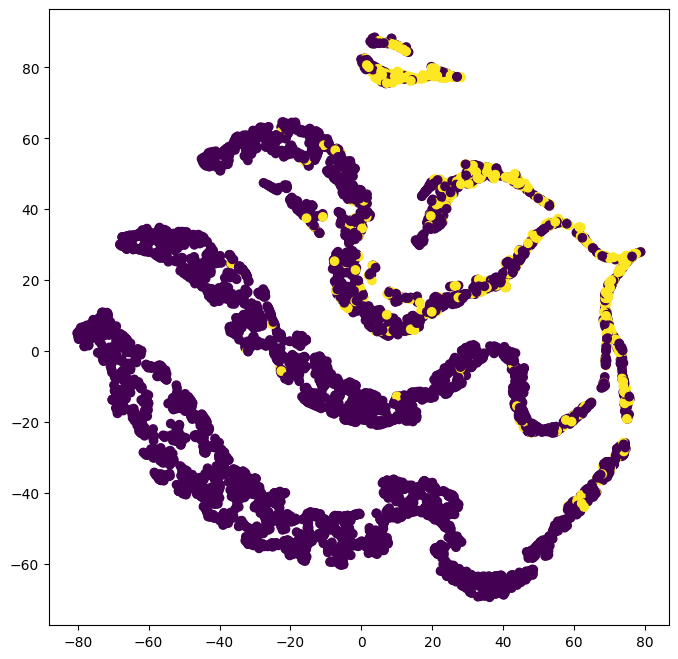

In [124]:
%matplotlib inline

# T-SNE plot for CV dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_cv)
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_cv.values)
plt.show()

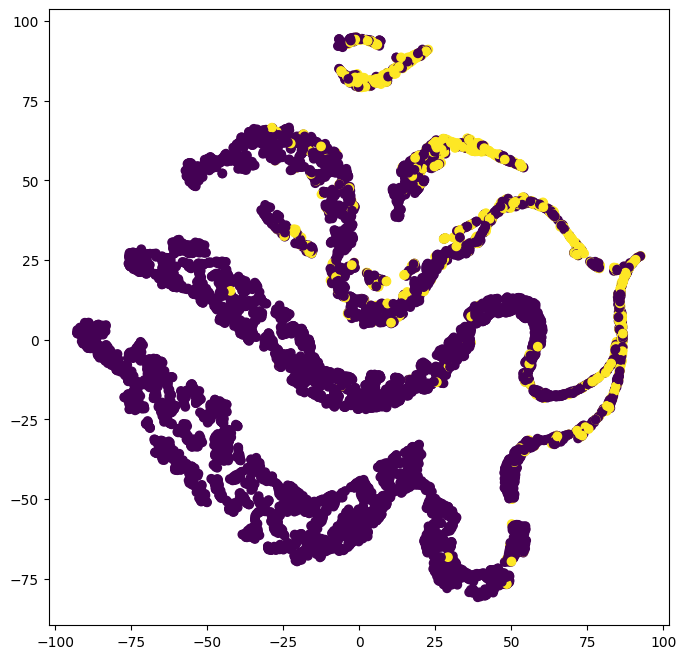

In [125]:
%matplotlib inline

# T-SNE plot for test dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_test)
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_test.values)
plt.show()

## Modelling with "Duration" Column

Seeing how the model performs with the "duration" feature. It is to be noted again that the duration feature can not be included in the final model as it is highly correlated with the target variable, and to build any reasonable predictive model, we cannot include this feature.

In [126]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Assuming your data is in a DataFrame named 'data'
selected_feature = 'duration'

# Check if the 'duration' column exists in the DataFrame
if selected_feature not in data.columns:
    raise ValueError(f"'{selected_feature}' column not found in the DataFrame. Available columns: {data.columns}")

    # Separate the target variable from the features
    X_train = data.drop(columns=[selected_feature])
    y_train = data[selected_feature]

    # Convert 'no' and 'yes' values in the 'duration' column to numeric (0 and 1)
    y_train = y_train.replace({'no': 0, 'yes': 1})

    # Check if the 'duration' column exists in 'X_train' before one-hot encoding
    if 'duration' in X_train.columns:
     categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                            'contact', 'month', 'day_of_week', 'poutcome']

    encoder = OneHotEncoder(drop='first')
    X_encoded = encoder.fit_transform(X_train[categorical_features])

    # Get the column names after One-Hot Encoding
    columns_encoded = encoder.get_feature_names_out(input_features=categorical_features)

    # Check if the number of columns in X_encoded matches the number of columns in columns_encoded
    if X_encoded.shape[1] != len(columns_encoded):
        raise ValueError("Mismatch between the number of columns in X_encoded and columns_encoded.")

    X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=columns_encoded)

    # Combine the encoded categorical features with the remaining numeric features
    X_train_encoded = pd.concat([X_train.drop(columns=categorical_features), X_encoded_df], axis=1)

    # Handle missing values in the 'duration' column by replacing with the median value
    imputer = SimpleImputer(strategy='median')
    X_train_encoded['duration'] = imputer.fit_transform(X_train_encoded[['duration']])

    # Check the data types of the columns in X_train_encoded (excluding the target variable 'y_train')
    non_numeric_columns = X_train_encoded.drop(columns=['y']).select_dtypes(exclude=['float', 'int']).columns
    if len(non_numeric_columns) > 0:
        raise ValueError(f"Non-numeric values found in columns: {non_numeric_columns}")

    # Check the data types of the target variable 'y_train'
    if y_train.dtype != int:
        raise ValueError("Non-numeric values found in the target variable 'y_train'. Please ensure that 'y_train' contains only numeric values (0 and 1).")

    # Apply T-SNE
    model_tsne = TSNE(n_components=2, random_state=0, perplexity=30)
    tsne_data = model_tsne.fit_transform(X_train_encoded)

    # Plot T-SNE visualization
    plt.figure(figsize=(8, 8))
    plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_train.values, cmap='viridis')
    plt.colorbar()
    plt.title("T-SNE Plot without " + selected_feature + " Feature")
    plt.xlabel("T-SNE Dimension 1")
    plt.ylabel("T-SNE Dimension 2")
    plt.show()

As we can see that, with duration column the AUC score is very good, 0.933. Which is a lot better than what the original paper achieved (AUC of 0.8). Now let's see how the same model does without the duration feature.

# Removing "Duration" feature

**duration:** last contact duration, in seconds (numeric).

***Important note:*** this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [129]:
import pandas as pd

# Assuming you have already loaded your datasets: X_train, X_cv, X_test

# Check if 'duration' exists in the columns before dropping it
if 'duration' in X_train.columns:
    # Remove 'duration' from train dataset
    X_train = X_train.drop("duration", axis=1)
    print("The shape of the train dataset after removing 'duration': ", X_train.shape)
else:
    print("The 'duration' feature is not present in the train dataset.")

if 'duration' in X_cv.columns:
    # Remove 'duration' from CV dataset
    X_cv = X_cv.drop("duration", axis=1)
    print("The shape of the CV dataset after removing 'duration': ", X_cv.shape)
else:
    print("The 'duration' feature is not present in the CV dataset.")

if 'duration' in X_test.columns:
    # Remove 'duration' from test dataset
    X_test = X_test.drop("duration", axis=1)
    print("The shape of the test dataset after removing 'duration': ", X_test.shape)
else:
    print("The 'duration' feature is not present in the test dataset.")

The shape of the train dataset after removing 'duration':  (26352, 9)
The shape of the CV dataset after removing 'duration':  (6588, 9)
The shape of the test dataset after removing 'duration':  (8236, 9)


## Visualize using T-SNE

Visualize the dataset with T-SNE plot but this time without the "Duration" column to see if there is any noticable change in the data.

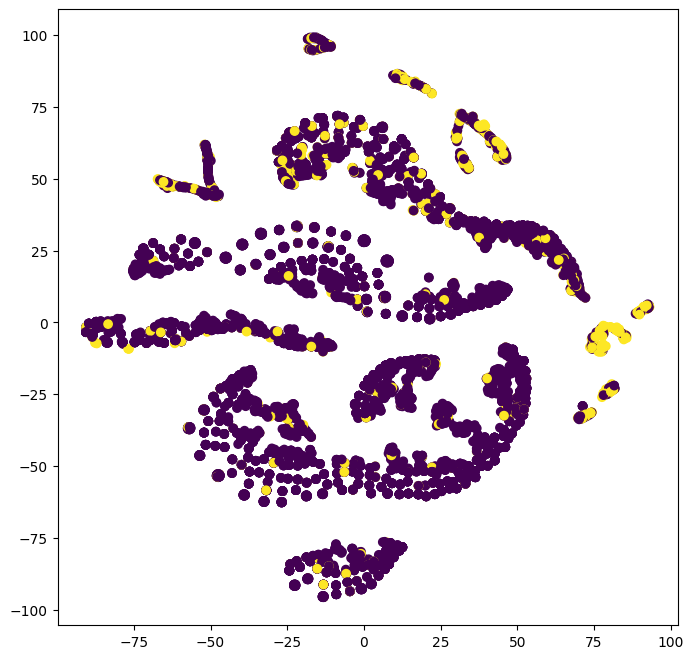

In [130]:
%matplotlib inline

# T-SNE plot for CV dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_cv)
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_cv.values)
plt.show()

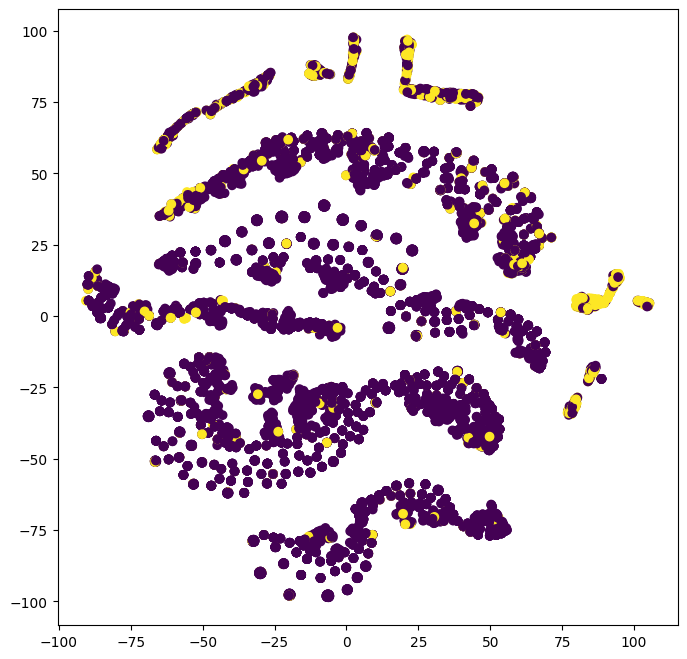

In [132]:
%matplotlib inline

# T-SNE plot for test dataset
model = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_data = model.fit_transform(X_test)
plt.figure(figsize=(8,8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=y_test.values)
plt.show()

## Modelling Without "Duration" Column

Here we will just implement a LogisticRegression model without any hyperparameter tuning just to check how much the performance changed once we removed the "Duration" column from the dataset.

We will use two variations of the LogisticRegression model:
- With class balancing
- Without class balancing

This is to check the model is performing in both the scenarios.

In [134]:
print(y_train.isnull().sum())

0


In [135]:
# Check for missing values in y_train
print("Number of missing values in y_train:", y_train.isnull().sum())

# Print some samples of y_train
print(y_train.head())

Number of missing values in y_train: 0
1820     0
34256    0
22716    0
30644    1
35558    0
Name: y, dtype: int64


### KNN

In [137]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Logistic Regression

### XGBoost with RandomizedSearchCV hyper parameter tuning

In [138]:
# For RandomizedSearchCV I will use 80% of data for train and
# 20% of data for test. RandomizedSearchCV will internally split train data for Cross validation.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2)

print("X Train:", X_train.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y Train:", y_test.shape)

X Train: (32940, 20)
X Test: (8236, 20)
Y Train: (32940,)
Y Train: (8236,)


In [139]:
#OneHotEncoder(categorical_cols, X_train, X_test)
X_train = X_train.drop(categorical_cols, axis=1)
X_test = X_test.drop(categorical_cols, axis=1)

print("Shape of train: ", X_train.shape)
print("Shape of test: ", X_test.shape)

Shape of train:  (32940, 10)
Shape of test:  (8236, 10)


In [140]:
x_cfl=XGBClassifier(tree_method='gpu_hist', max_bin=16)

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_iter=20, cv=10, scoring='roc_auc')
random_cfl.fit(X_train, y_train)
print (random_cfl.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1
[CV 1/10; 1/20] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1;, score=nan total time=   0.0s
[CV 2/10; 1/20] START colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1
[CV 2/10; 1/20] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1;, score=nan total time=   0.0s
[CV 3/10; 1/20] START colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1
[CV 3/10; 1/20] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1;, score=nan total time=   0.0s
[CV 4/10; 1/20] START colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1
[CV 4/10; 1/20] END colsample_bytree=1, learning_rate=0.01, max_depth=3, n_estimators=1000, subsample=1;, sc

ValueError: ignored

In [141]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'y_train' contains class labels as strings ('no' and 'yes')
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)

# Now 'y_train_numeric' will have binary labels (0 and 1)

In [142]:
print(data['education'].unique())
print(data['education'].dtype)

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
object


# Response coding

#### Train test split


In [143]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size=0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size=0.2)

print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26352, 20)
X CV: (6588, 20)
X Test: (8236, 20)
Y Train: (26352,)
Y CV: (6588,)
Y Test: (8236,)


In [144]:
y_train.replace({"no":0, "yes":1}, inplace=True)
y_cv.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)

In [145]:
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
5658,53,services,married,high.school,unknown,yes,no,telephone,may,mon,107,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
21819,36,admin.,married,university.degree,no,yes,no,cellular,aug,wed,129,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
24940,36,housemaid,married,basic.4y,no,no,no,cellular,nov,tue,242,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8
23433,46,technician,divorced,professional.course,no,no,no,cellular,aug,wed,101,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1
29260,31,admin.,married,high.school,no,no,no,cellular,apr,fri,246,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1


import numpy as np
from google.colab import autoviz
df_2756257393659618082 = autoviz.get_df('df_2756257393659618082')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_2756257393659618082, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4968667398327609339 = autoviz.get_df('df_4968667398327609339')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4968667398327609339, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz
df_266364032579739911 = autoviz.get_df('df_266364032579739911')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_266364032579739911, *['campaign'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1895611970067924496 = autoviz.get_df('df_1895611970067924496')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_1895611970067924496, *['previous'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3328951126677120653 = autoviz.get_df('df_3328951126677120653')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3328951126677120653, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3679892342236702468 = autoviz.get_df('df_3679892342236702468')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3679892342236702468, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6104492830762100580 = autoviz.get_df('df_6104492830762100580')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_6104492830762100580, *['campaign'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7686158809391777868 = autoviz.get_df('df_7686158809391777868')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_7686158809391777868, *['previous'], **{})
chart

import numpy as np
from google.colab import autoviz
df_260864475324372113 = autoviz.get_df('df_260864475324372113')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_260864475324372113, *['job'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6406868905849118927 = autoviz.get_df('df_6406868905849118927')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_6406868905849118927, *['marital'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8283899980281487785 = autoviz.get_df('df_8283899980281487785')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_8283899980281487785, *['education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5975774471179117810 = autoviz.get_df('df_5975774471179117810')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5975774471179117810, *['default'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1797033748819810195 = autoviz.get_df('df_1797033748819810195')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_1797033748819810195, *[[['age', 'duration'], ['duration', 'campaign'], ['campaign', 'previous'], ['previous', 'emp.var.rate']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_8709878443188362238 = autoviz.get_df('df_8709878443188362238')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_8709878443188362238, *['job', 'marital'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3878967029946935770 = autoviz.get_df('df_3878967029946935770')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_3878967029946935770, *['marital', 'education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3424122009753479814 = autoviz.get_df('df_3424122009753479814')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_3424122009753479814, *['education', 'default'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7221338908395859110 = autoviz.get_df('df_7221338908395859110')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_7221338908395859110, *['default', 'housing'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9092163195045410076 = autoviz.get_df('df_9092163195045410076')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_9092163195045410076, *['age', 'job'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5092569823154363477 = autoviz.get_df('df_5092569823154363477')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5092569823154363477, *['age', 'marital'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_1399031388385728027 = autoviz.get_df('df_1399031388385728027')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_1399031388385728027, *['age', 'education'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8565568818897453051 = autoviz.get_df('df_8565568818897453051')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_8565568818897453051, *['age', 'default'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_8490179849368689350 = autoviz.get_df('df_8490179849368689350')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8490179849368689350, *['campaign', 'age', 'job'], **{})
chart

import numpy as np
from google.colab import autoviz
df_540779841357192973 = autoviz.get_df('df_540779841357192973')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_540779841357192973, *['campaign', 'age', 'marital'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4805356707375015279 = autoviz.get_df('df_4805356707375015279')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_4805356707375015279, *['campaign', 'age', 'education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8067609863082104120 = autoviz.get_df('df_8067609863082104120')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_8067609863082104120, *['campaign', 'age', 'default'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4837186161170030825 = autoviz.get_df('df_4837186161170030825')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4837186161170030825, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_8480134333836255882 = autoviz.get_df('df_8480134333836255882')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_8480134333836255882, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7692404645951206298 = autoviz.get_df('df_7692404645951206298')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_7692404645951206298, *['campaign'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5137715787582827752 = autoviz.get_df('df_5137715787582827752')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_5137715787582827752, *['previous'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5133070812150349057 = autoviz.get_df('df_5133070812150349057')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_5133070812150349057, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2104363101945278287 = autoviz.get_df('df_2104363101945278287')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_2104363101945278287, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz
df_712578993107332088 = autoviz.get_df('df_712578993107332088')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_712578993107332088, *['campaign'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3658306296430273881 = autoviz.get_df('df_3658306296430273881')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3658306296430273881, *['previous'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3796793524669611338 = autoviz.get_df('df_3796793524669611338')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_3796793524669611338, *['job'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9165619374059431883 = autoviz.get_df('df_9165619374059431883')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_9165619374059431883, *['marital'], **{})
chart

import numpy as np
from google.colab import autoviz
df_1090955029203027567 = autoviz.get_df('df_1090955029203027567')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_1090955029203027567, *['education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_585915890054275258 = autoviz.get_df('df_585915890054275258')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_585915890054275258, *['default'], **{})
chart

import numpy as np
from google.colab import autoviz
df_913687681052095557 = autoviz.get_df('df_913687681052095557')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_913687681052095557, *[[['age', 'duration'], ['duration', 'campaign'], ['campaign', 'previous'], ['previous', 'emp.var.rate']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_7591840797427634957 = autoviz.get_df('df_7591840797427634957')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_7591840797427634957, *['job', 'marital'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2790396251207652672 = autoviz.get_df('df_2790396251207652672')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_2790396251207652672, *['marital', 'education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5433208311998428495 = autoviz.get_df('df_5433208311998428495')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_5433208311998428495, *['education', 'default'], **{})
chart

import numpy as np
from google.colab import autoviz
df_7974156322666455396 = autoviz.get_df('df_7974156322666455396')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_7974156322666455396, *['default', 'housing'], **{})
chart

import numpy as np
from google.colab import autoviz
df_9017733824980130869 = autoviz.get_df('df_9017733824980130869')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_9017733824980130869, *['age', 'job'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_5528614051094671315 = autoviz.get_df('df_5528614051094671315')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_5528614051094671315, *['age', 'marital'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7647849705330439684 = autoviz.get_df('df_7647849705330439684')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_7647849705330439684, *['age', 'education'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_3210614170698270304 = autoviz.get_df('df_3210614170698270304')

def violin_plot(df, value_colname, facet_colname, col_width=.3, col_length=3, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  plt.figure(figsize=(col_length, col_width * len(df[facet_colname].unique())))
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(df_3210614170698270304, *['age', 'default'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz
df_7653304541817731575 = autoviz.get_df('df_7653304541817731575')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_7653304541817731575, *['campaign', 'age', 'job'], **{})
chart

import numpy as np
from google.colab import autoviz
df_2747692479580997747 = autoviz.get_df('df_2747692479580997747')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_2747692479580997747, *['campaign', 'age', 'marital'], **{})
chart

import numpy as np
from google.colab import autoviz
df_6019388237813907788 = autoviz.get_df('df_6019388237813907788')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_6019388237813907788, *['campaign', 'age', 'education'], **{})
chart

import numpy as np
from google.colab import autoviz
df_637078396213714086 = autoviz.get_df('df_637078396213714086')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_637078396213714086, *['campaign', 'age', 'default'], **{})
chart

In [146]:
# Categorical boolean mask
categorical_feature_mask = data_x.dtypes==object

# filter categorical columns using mask and turn it into a list
categorical_cols = data_x.columns[categorical_feature_mask].tolist()

In [147]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [148]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: Categorical Features
# df: ['train_df', 'test_df', 'cv_df']
# algorithm
# ----------
# Consider all unique values and the number of occurances of given feature in train dataframe
# build a vector (1*2) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+20*alpha)
# feat_dict is like a look up table, for every categorical data it store a (1*2) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'feat_dict' look up table to 'res_fea'
# if it is not there is train:
# we add [1/2, 1/2] to 'res_fea'
# return 'res_fea'
# ----------------------

# get_fea_dict: Get categorical data Feature Dict
def get_fea_dict(alpha, feature, train_df, train_df_y):
    # value_count: it contains a dict like
    value_count = train_df[feature].value_counts()

    # feat_dict : Categorical feature Dict, which contains the probability array for each categorical variable
    feat_dict = dict()

    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of the particular
        # categorical feature belongs to particular class
        # vec is 2 diamensional vector
        vec = []
        for k in range(0, 2):
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = train_df.loc[(train_df_y==k) & (train_df[feature]==i)]

            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 20*alpha))

        # we are adding the categorical feature to the dict as key and vec as value
        feat_dict[i]=vec
    return feat_dict

# Get Response coded feature
def get_response_feature(alpha, feature, train_df, train_df_y):

    feat_dict = get_fea_dict(alpha, feature, train_df, train_df_y)
    # value_count is similar in get_fea_dict
    value_count = train_df[feature].value_counts()

    # res_fea: response coded feature, it will contain the response coded feature for each feature value in the data
    res_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to res_fea
    # if not we will add [1/2, 1/2] to res_fea
    for index, row in train_df.iterrows():
        if row[feature] in dict(value_count).keys():
            res_fea.append(feat_dict[row[feature]])
        else:
            res_fea.append([1/2, 1/2])
    return res_fea

In [149]:
def ResponseEncoder(categorical_cols, x_df, y_df):

  """
    This function takes Categorical column names and X and Y dataframe.

    Returns the response coded dataframe
  """
  print("Encoding Train dataset")
  print("Shape of the train dataset before encoding: ", X_train.shape)
  for i in (categorical_cols):
    temp_response_coded_feature = np.array(get_response_feature(alpha=1, feature=i, train_df=x_df, train_df_y=y_df))
    df_response = pd.DataFrame(temp_response_coded_feature, columns=[i+"_0", i+"_1"])
    x_df = pd.concat([x_df, df_response], axis=1)

  # Remove the categorical features as the response coded features are added
  x_df = x_df.drop(categorical_cols, axis=1)
  return x_df

In [150]:
# Reset index so that pd.concat works properly in ResponseEncoder function
X_train = X_train.reset_index().drop("index",axis=1)
X_test = X_test.reset_index().drop("index",axis=1)
X_cv = X_cv.reset_index().drop("index",axis=1)

In [151]:
X_train = ResponseEncoder(categorical_cols, X_train, y_train)
print("Shape of the train dataset after encoding: ", X_train.shape)

X_cv = ResponseEncoder(categorical_cols, X_cv, y_cv)
print("Shape of the cv dataset after encoding: ", X_cv.shape)

X_test = ResponseEncoder(categorical_cols, X_test, y_test)
print("Shape of the test dataset after encoding: ", X_test.shape)

Encoding Train dataset
Shape of the train dataset before encoding:  (26352, 20)
Shape of the train dataset after encoding:  (26352, 30)
Encoding Train dataset
Shape of the train dataset before encoding:  (26352, 30)
Shape of the cv dataset after encoding:  (6588, 30)
Encoding Train dataset
Shape of the train dataset before encoding:  (26352, 30)
Shape of the test dataset after encoding:  (8236, 30)


In [152]:
# Remove duration feature
X_train = X_train.drop("duration", axis=1)
X_cv = X_cv.drop("duration", axis=1)
X_test = X_test.drop("duration", axis=1)

In [153]:
X_train.to_csv("Response_coded_features_train.csv")
X_cv.to_csv("Response_coded_features_cv.csv")
X_test.to_csv("Response_coded_features_test.csv")

### KNN

In [154]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

AUC for k =  1 is 0.6663086585392223
AUC for k =  3 is 0.7188782715467749
AUC for k =  5 is 0.7433063518562142
AUC for k =  7 is 0.7512545647174228
AUC for k =  9 is 0.7552126825460226
AUC for k =  11 is 0.7544047176048733
AUC for k =  13 is 0.7572042592270164
AUC for k =  15 is 0.7609525337666756


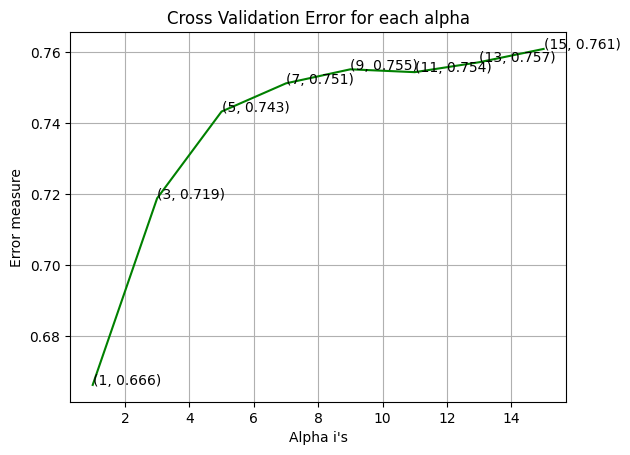

For values of best alpha =  15 The train AUC is: 0.8693145572882293
For values of best alpha =  15 The cross validation AUC is: 0.7609525337666756
For values of best alpha =  15 The test AUC is: 0.7432807810967048


In [155]:
%matplotlib inline

alpha = [x for x in range(1, 17, 2)]
cv_auc_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))

for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### Logistic Regression

AUC for k =  1e-05 is 0.7537316031503805
AUC for k =  0.0001 is 0.7563415575060513
AUC for k =  0.001 is 0.756661670939777
AUC for k =  0.01 is 0.7559249434709034
AUC for k =  0.1 is 0.7550285575777439
AUC for k =  1 is 0.7563562374324467
AUC for k =  10 is 0.7560938195233917
AUC for k =  100 is 0.7556841471588653
AUC for k =  1000 is 0.7555305200221678


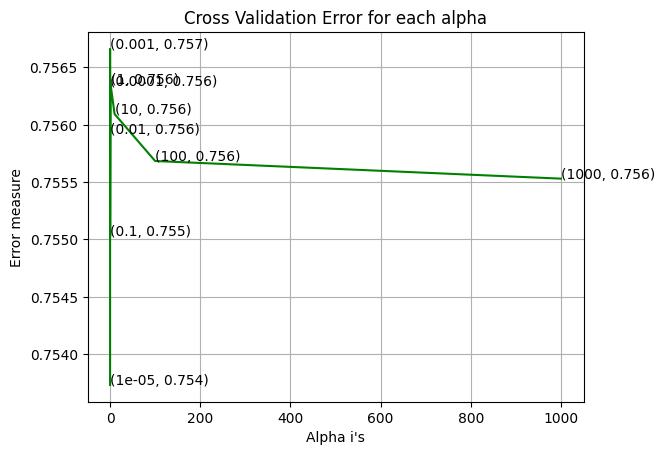

For values of best alpha =  0.001 The train AUC is: 0.7637938260687327
For values of best alpha =  0.001 The cross validation AUC is: 0.756661670939777
For values of best alpha =  0.001 The test AUC is: 0.7381154055171883


In [156]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))

for i in range(len(cv_auc_array)):
    print ('AUC for k = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))

### Linear SVM

AUC for alpha =  1e-05 is 0.5
AUC for alpha =  0.0001 is 0.5
AUC for alpha =  0.001 is 0.7597649391010649
AUC for alpha =  0.01 is 0.7568207603746682
AUC for alpha =  0.1 is 0.7549437781578627
AUC for alpha =  1 is 0.7494261741949654
AUC for alpha =  10 is 0.7290203937179021
AUC for alpha =  100 is 0.5945529507221045
AUC for alpha =  1000 is 0.436134240530025


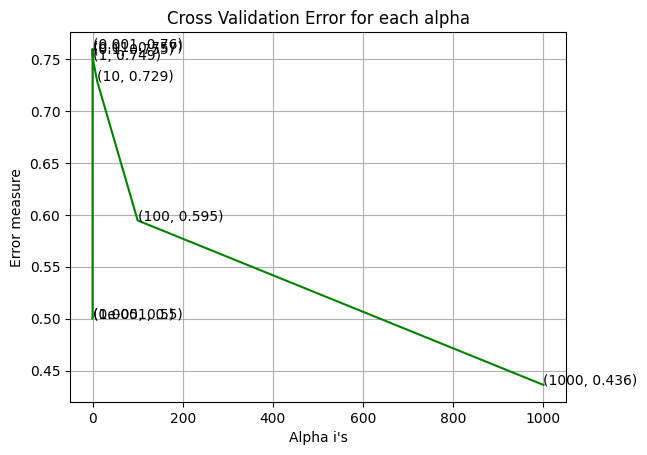

For values of best alpha =  0.001 The train AUC is: 0.7639595690550188
For values of best alpha =  0.001 The cross validation AUC is: 0.758971312692674
For values of best alpha =  0.001 The test AUC is: 0.7369496097281804


In [157]:
%matplotlib inline

alpha = [10 ** x for x in range(-5, 4)]
cv_auc_array=[]
for i in alpha:
    linearSVM = SGDClassifier(penalty='l2',alpha=i,class_weight='balanced')
    linearSVM.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_auc_array.append(roc_auc_score(y_cv, predict_y[:,1]))

for i in range(len(cv_auc_array)):
    print ('AUC for alpha = ',alpha[i],'is',cv_auc_array[i])

best_alpha = np.argmax(cv_auc_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_auc_array,c='g')
for i, txt in enumerate(np.round(cv_auc_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_auc_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

linearSVM = SGDClassifier(penalty='l2', alpha=alpha[best_alpha], class_weight='balanced')
linearSVM.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(linearSVM, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train AUC is:",roc_auc_score(y_train, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation AUC is:",roc_auc_score(y_cv, predict_y[:,1]))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test AUC is:",roc_auc_score(y_test, predict_y[:,1]))